* **작성자** : 김종원
* 날짜 : 2021.10.13

# 소개


**분석 목적** : 우리나라가 세계적으로 주목할만한 방역 선진국인가에 대해 분석을 하고 추가로 우리 대한민국 국민들이 코로나에 대응하여 잘 견디며 잘하고 있는지 아니면 더 노력해야 하는지 파악하고자 합니다.

**데이터 소개** : 분석할 데이터는 2020년 1월 22일부터 2021 10월 12일까지 집계된 전 세계 코로나 데이터에서 우리나라와 비슷한 수준 또는 이상의 경제력을 가진 나라를 4개 국가를 선택해 총 5개 국가가 포함된 데이터입니다.

---

### 모듈 임포트

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import folium
import datetime
import operator 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

# 문제 1
어떤경로든covid-19의데이터를얻으세요.가급적2020년1~2월부터 최소600일이상의데이터면좋겠습니다.

In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
print(f"코로나 확진자 데이터 : {confirmed_df.shape}")
confirmed_df.head()

코로나 확진자 데이터 : (279, 634)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794


In [5]:
print(f"코로나 사망자 데이터 : {deaths_df.shape}")
deaths_df.head()

코로나 사망자 데이터 : (279, 634)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7206,7212,7214,7220,7221,7221,7221,7225,7228,7230
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2713,2713,2725,2734,2746,2753,2759,2768,2777,2783
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5822,5826,5831,5838,5843,5846,5850,5853,5855,5859
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1577,1577,1587,1598,1603,1613,1618,1622,1629,1642


데이터를 수집했고, 수집한 데이터를 csv 파일로 저장하자.

In [6]:
# 분석할 데이터 저장.
confirmed_df.to_csv("원본 코로나 확진자수.csv",encoding="utf-8-sig",index=False)
deaths_df.to_csv("원본 코로나 사망자수.csv",encoding="utf-8-sig",index=False)

# 문제 2
* 우리는 전세계의 데이터를 사용하지 않을려고 합니다. 애초 목적에 비춰 우리와 비슷한
수준 혹은 이 이상의 경제력을 가진 나라들을 가지고 다시 데이터를 구성해야 하는것이
 타당해보입니다.
* 예를 들어 누구나 선진국으로 인정하는 미국, 영국, 프랑스, 이탈리아, 이스라엘, 일본
등등의 나라가 될 것 입니다. 어쩌면 여러분들은 G20국가를 선택해도 되지않을까 합니
다. 단 자신들의 확진자수를 공개하고 있는 나라 중에서 선택하면 될 것 입니다.
* 여러분들이 직접 우리나라와 비교할 4개 국가를 선택 해주세요.(단 중국은 여러 이슈가
있어서 데이터 수집에서 제외해주세요)
* 그래서 우리나라와 선택된 4개국가,합쳐서 5개의 국가를 앞으로는“전체데이터”라고
 하겠습니다.
---

## 1. 분석할 국가 선정
먼저. 우리나라와 비슷한 수준 혹은 이상의 경제력을 가진 나라에 대한 정보 알아보고자 합니다.

몇달전에 우리나라가 선진국으로 서방국가들에게 인식되면서 G20이 아니라 G7까지 넘어보면서, G7 모임에 초빙[1] 되었다. 그래서 G7 국가들을 리스트 업 하여 그 중에서 4개국을 선택하고, 코로나 백신 접종을 부스터 샷까지 해야 효과있다고 주장을 하는 이스라엘을 포함시켜 5개 국가를 선택하고, 선택된 5개 국가와 우리나라를 합쳐 `G6라고 가상의 이름`을 만들었다.

**G7 국가 리스트** [2]
* 미국
* 캐나다
* 영국
* 프랑스
* 독일
* 일본
* 이탈리아

출저
* [1] : [한국은 사실상 G8 국가?...G7 정상회의 팩트체크](https://www.ytn.co.kr/_ln/0101_202106200800361579)
* [2] : [주요 7개국 (G7)](https://www.voakorea.com/a/world_behind-news_g7-summit/6059384.html)
 
**G7 국가에서 미국, 영국, 독일, 일본을 선정하고 추가적으로 이스라엘을 포함시켜 우리나라와 비교하고자 합니다.**

In [7]:
# 데이터에 저장된 국가 정보 확인.
deaths_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

선정한 5개국의 나라/지역 정보 컬럼에 대한 값 정보.
* 대한민국 -> "Korea, South"
* 일본 -> "Japan"
* 미국 -> "US"
* 영국 -> "United Kingdom"
* 독일 -> "Germany"
* 이스라엘 -> Israel

In [8]:
# 변수에 저정.
G6_Country = ["Korea, South","Japan","US","United Kingdom","Germany","Israel"]

In [9]:
# 이상 데이터가 있는지 확인
for country in G6_Country:
    print("----"*10)
    print(f"{country}의 사망자 shape : ",end=" ")
    print(deaths_df[deaths_df["Country/Region"] ==country].shape)
    print(f"{country}의 확진자 shape : ",end=" ")
    print(confirmed_df[confirmed_df["Country/Region"] ==country].shape)
    print("----"*10)
    print()

----------------------------------------
Korea, South의 사망자 shape :  (1, 634)
Korea, South의 확진자 shape :  (1, 634)
----------------------------------------

----------------------------------------
Japan의 사망자 shape :  (1, 634)
Japan의 확진자 shape :  (1, 634)
----------------------------------------

----------------------------------------
US의 사망자 shape :  (1, 634)
US의 확진자 shape :  (1, 634)
----------------------------------------

----------------------------------------
United Kingdom의 사망자 shape :  (12, 634)
United Kingdom의 확진자 shape :  (12, 634)
----------------------------------------

----------------------------------------
Germany의 사망자 shape :  (1, 634)
Germany의 확진자 shape :  (1, 634)
----------------------------------------

----------------------------------------
Israel의 사망자 shape :  (1, 634)
Israel의 확진자 shape :  (1, 634)
----------------------------------------



데이터를 확인하니 영국에 경우 1개에 데이터가 존재하는게 아니라 12개에 데이터가 존재해서 해당 데이터에 대해 조사를 진행한다.

In [10]:
deaths_df[deaths_df["Country/Region"] ==G6_Country[3]]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
258,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
259,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,75,82,82,87,87,89,89,89,89,92
260,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,37,37,37,37,37,37,37,37,37,37
261,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
262,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,97,97,97,99,99,100,100,100,100,100
263,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,97,97,97,97,97,97,97,97,97,97
265,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,52,52,52,52,54,54,54,54,54,54
266,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
267,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


영국은 총 12개에 데이터가 존재하고 이 데이터는 영국의 해외 영토를 가리킨다. 그래서 해외 영토를 가리키는 데이터는 분석에서 제외하고 영국 본토 데이터를 선점하도록하겠다.

In [11]:
df = deaths_df[deaths_df["Country/Region"] ==G6_Country[3]]
df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
265,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,52,52,52,52,54,54,54,54,54,54
266,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
267,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
269,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,136953,136986,137152,137295,137417,137541,137697,137735,137763,137944


In [12]:
# 지도 시각화
my_map = folium.Map(
    location=[55.378100,-3.436000],
    zoom_start=5,
    tiles="Stamen Toner"
)
for idx, rows in df.iterrows():
    
    # location 
    lat, lng = rows.Lat, rows.Long
    
    # Marker 
    folium.Marker(
        location=[lat, lng],
        popup=rows["Country/Region"],
        tooltip=rows["Province/State"], 
        icon=folium.Icon(
            icon="star",
            color="blue",
            icon_color="white",
        )
    ).add_to(my_map)
my_map

시각화했을때, Province/State(주/도)에 대한 컬럼이 Nan인게 영국 본토를 가리키고 있기에 해당 데이터를 가지고 분석하겠다.

## 2. 원본 데이터에서 G6 국가의 데이터를 추출해 전체 데이터로 변환


In [13]:
# 확진자 정보
df_C = pd.DataFrame()
for country in G6_Country:
    print(f"{country} 입니다.")
    tmp = confirmed_df[confirmed_df["Country/Region"] ==country]
    if country == G6_Country[3]:
        tmp = tmp[tmp["Province/State"].isnull()]
    tmp = tmp.drop(["Province/State","Lat","Long"],axis=1)
    df_C = pd.concat([df_C,tmp],axis=0)
df_C.reset_index(drop=True,inplace=True)
df_C

Korea, South 입니다.
Japan 입니다.
US 입니다.
United Kingdom 입니다.
Germany 입니다.
Israel 입니다.


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,"Korea, South",1,1,2,2,3,4,4,4,4,...,319777,321352,323379,325804,327976,329925,331519,332816,334163,335742
1,Japan,2,2,2,2,4,4,7,7,11,...,1705919,1706525,1707511,1708634,1709603,1710426,1711207,1711756,1712127,1712740
2,US,1,1,2,2,5,5,5,6,6,...,43683048,43852255,43947489,44058827,44158910,44290052,44317989,44340183,44456385,44562693
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,7900680,7934936,7967985,8006660,8046390,8081300,8120713,8154306,8193769,8231437
4,Germany,0,0,0,0,0,1,4,4,4,...,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346,4331274
5,Israel,0,0,0,0,0,0,0,0,0,...,1290129,1293498,1296343,1298589,1300968,1302777,1304356,1305711,1307870,1309738


In [14]:
# 사망자 정보
df_D = pd.DataFrame()
for country in G6_Country:
    print(f"{country} 입니다.")
    tmp = deaths_df[deaths_df["Country/Region"] ==country]
    if country == G6_Country[3]:
        tmp = tmp[tmp["Province/State"].isnull()]
    tmp = tmp.drop(["Province/State","Lat","Long"],axis=1)
    df_D = pd.concat([df_D,tmp],axis=0)
df_D.reset_index(drop=True,inplace=True)
df_D

Korea, South 입니다.
Japan 입니다.
US 입니다.
United Kingdom 입니다.
Germany 입니다.
Israel 입니다.


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,"Korea, South",0,0,0,0,0,0,0,0,0,...,2513,2524,2536,2544,2554,2560,2575,2583,2594,2605
1,Japan,0,0,0,0,0,0,0,0,0,...,17747,17771,17807,17833,17872,17918,17945,17952,17972,17999
2,US,0,0,0,0,0,0,0,0,0,...,701704,703819,705553,708110,710502,712339,712618,712873,714055,716471
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,136953,136986,137152,137295,137417,137541,137697,137735,137763,137944
4,Germany,0,0,0,0,0,0,0,0,0,...,93798,93887,93963,94031,94117,94182,94206,94213,94308,94393
5,Israel,0,0,0,0,0,0,0,0,0,...,7821,7843,7855,7862,7882,7885,7897,7920,7940,7952


In [15]:
# 분석할 데이터 저장.
df_C.to_csv("G6 코로나 확진자수.csv",encoding="utf-8-sig",index=False)
df_D.to_csv("G6 코로나 사망자수.csv",encoding="utf-8-sig",index=False)

# 문제 3
* 이제 전체 데이터의 단순 시간대별 확진자수,사망자수 등을 시각화하고
* 구성된 5개국가들을 개별적으로 동일하게 확진자수와 사망자수를 시각화해주세요.
* 여러분들 판단에 우리나라의 방역 대응 능력을 평가할 수 있는 시각화 방법을 고민하고 
제시해주세요.
* 이번 문제는 하나의 그림으로 끝나지 않을 수도 있습니다.

## 1. 전체 데이터에 대해서 확진자 수, 시망자 수 등을 시각화

1) 데이터 로드

In [16]:
df_C = pd.read_csv("./G6 코로나 확진자수.csv")
df_C

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,"Korea, South",1,1,2,2,3,4,4,4,4,...,319777,321352,323379,325804,327976,329925,331519,332816,334163,335742
1,Japan,2,2,2,2,4,4,7,7,11,...,1705919,1706525,1707511,1708634,1709603,1710426,1711207,1711756,1712127,1712740
2,US,1,1,2,2,5,5,5,6,6,...,43683048,43852255,43947489,44058827,44158910,44290052,44317989,44340183,44456385,44562693
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,7900680,7934936,7967985,8006660,8046390,8081300,8120713,8154306,8193769,8231437
4,Germany,0,0,0,0,0,1,4,4,4,...,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346,4331274
5,Israel,0,0,0,0,0,0,0,0,0,...,1290129,1293498,1296343,1298589,1300968,1302777,1304356,1305711,1307870,1309738


In [17]:
df_D = pd.read_csv("./G6 코로나 사망자수.csv")
df_D

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,"Korea, South",0,0,0,0,0,0,0,0,0,...,2513,2524,2536,2544,2554,2560,2575,2583,2594,2605
1,Japan,0,0,0,0,0,0,0,0,0,...,17747,17771,17807,17833,17872,17918,17945,17952,17972,17999
2,US,0,0,0,0,0,0,0,0,0,...,701704,703819,705553,708110,710502,712339,712618,712873,714055,716471
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,136953,136986,137152,137295,137417,137541,137697,137735,137763,137944
4,Germany,0,0,0,0,0,0,0,0,0,...,93798,93887,93963,94031,94117,94182,94206,94213,94308,94393
5,Israel,0,0,0,0,0,0,0,0,0,...,7821,7843,7855,7862,7882,7885,7897,7920,7940,7952


2) 데이터 변환 -> row로 정보가 기입된것을 columns에 들어가도록 transformer를 진행한다.

In [18]:
df_C = pd.concat([df_C,pd.DataFrame(df_C.sum(axis=0)).T],axis=0)
df_C.reset_index(drop=True,inplace=True)
df_C.loc[6,"Country/Region"] = "Total"
df_C

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,"Korea, South",1,1,2,2,3,4,4,4,4,...,319777,321352,323379,325804,327976,329925,331519,332816,334163,335742
1,Japan,2,2,2,2,4,4,7,7,11,...,1705919,1706525,1707511,1708634,1709603,1710426,1711207,1711756,1712127,1712740
2,US,1,1,2,2,5,5,5,6,6,...,43683048,43852255,43947489,44058827,44158910,44290052,44317989,44340183,44456385,44562693
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,7900680,7934936,7967985,8006660,8046390,8081300,8120713,8154306,8193769,8231437
4,Germany,0,0,0,0,0,1,4,4,4,...,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346,4331274
5,Israel,0,0,0,0,0,0,0,0,0,...,1290129,1293498,1296343,1298589,1300968,1302777,1304356,1305711,1307870,1309738
6,Total,4,4,6,6,12,14,20,21,25,...,59160047,59373567,59515471,59682914,59839723,60020114,60098312,60163209,60327660,60483624


In [19]:
df_D = pd.concat([df_D, pd.DataFrame(df_D.sum(axis=0)).T],axis=0)
df_D.reset_index(drop=True,inplace=True)
df_D.loc[6,"Country/Region"] = "Total"
df_D

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21
0,"Korea, South",0,0,0,0,0,0,0,0,0,...,2513,2524,2536,2544,2554,2560,2575,2583,2594,2605
1,Japan,0,0,0,0,0,0,0,0,0,...,17747,17771,17807,17833,17872,17918,17945,17952,17972,17999
2,US,0,0,0,0,0,0,0,0,0,...,701704,703819,705553,708110,710502,712339,712618,712873,714055,716471
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,136953,136986,137152,137295,137417,137541,137697,137735,137763,137944
4,Germany,0,0,0,0,0,0,0,0,0,...,93798,93887,93963,94031,94117,94182,94206,94213,94308,94393
5,Israel,0,0,0,0,0,0,0,0,0,...,7821,7843,7855,7862,7882,7885,7897,7920,7940,7952
6,Total,0,0,0,0,0,0,0,0,0,...,960536,962830,964866,967675,970344,972425,972938,973276,974632,977364


In [20]:
df_TD = df_D[df_D["Country/Region"] == "Total"].drop("Country/Region",axis=1).T
df_TC = df_C[df_C["Country/Region"] == "Total"].drop("Country/Region",axis=1).T

In [21]:
df_TD.info(),df_TC.info(),

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 1/22/20 to 10/12/21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   6       630 non-null    object
dtypes: object(1)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 1/22/20 to 10/12/21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   6       630 non-null    object
dtypes: object(1)
memory usage: 9.8+ KB


(None, None)

시간 정보가 문자열이기에 해당 정보를 데이터 타임형태로 변환한다.

In [22]:
df_TD = df_TD.reset_index()
df_TC = df_TC.reset_index()

df_TD["index"] = pd.to_datetime(df_TD["index"])
df_TC["index"] = pd.to_datetime(df_TC["index"])

df_TD.set_index("index",inplace=True)
df_TC.set_index("index",inplace=True)

df_TD.columns = ["Total_Dead"]
df_TC.columns = ["Total_Confirm"]

추세 정보를 알수 있는 이동평균 방법으로 7일마다의 변화도 같이 시각화를 진행한다.

In [23]:
df_TD["Total_Dead_MV"] = df_TD.rolling(window=7).mean()
df_TC["Total_Confirm_MV"] = df_TC.rolling(window=7).mean()

In [24]:
df_TC.head()

,Total_Confirm,Total_Confirm_MV
index,,
2020-01-22,4,NaN
2020-01-23,4,NaN
2020-01-24,6,NaN
2020-01-25,6,NaN
2020-01-26,12,NaN


3) G6국가의 전체 누적 코로나 확진자/ 사망자수 시각화

In [25]:
def Line_Plot(origin, origin_MV,labels1,labels2 ,title):
    
    plt.figure(figsize=(20,8))
    plt.plot(origin,label = f"{labels1} Person",color = 'red')
    plt.plot(origin_MV,label = f"Moving Average 7 Day {labels2} Person",color = 'blue')

    plt.legend(loc = "upper left")
    # plt.grid(True)
#     plt.title("G5 국가의 전체 코로나 누적 사망자 현황",fontsize=22)
    plt.title(f"{title}",fontsize=22)
    plt.xticks(rotation = 90)
    plt.ylabel("명(인원수)")
    plt.xlabel("일시")
    plt.show()

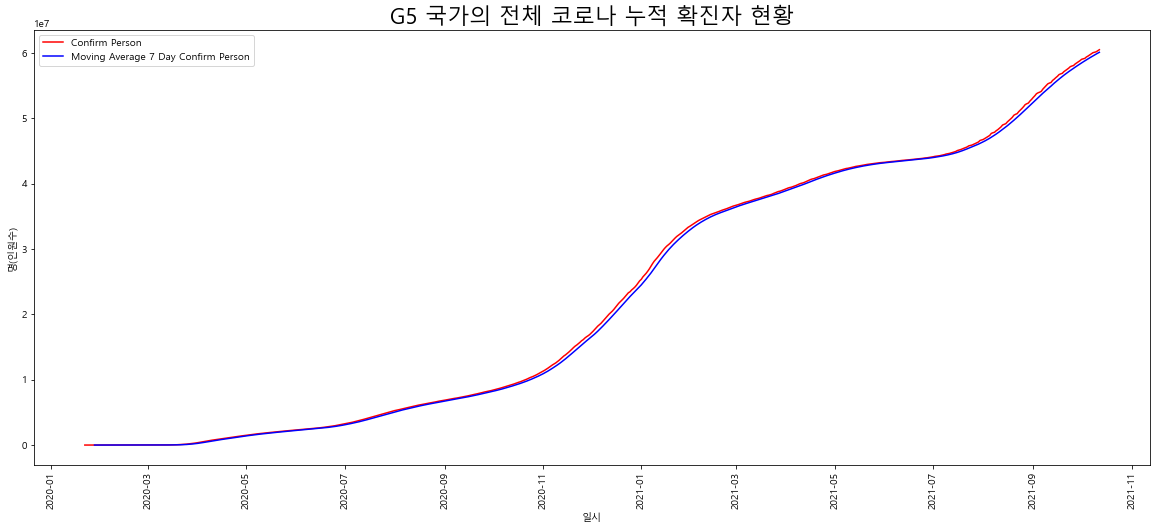

In [26]:
Line_Plot(origin = df_TC["Total_Confirm"],origin_MV=df_TC["Total_Confirm_MV"],labels1="Confirm",labels2 = "Confirm",title = "G5 국가의 전체 코로나 누적 확진자 현황")

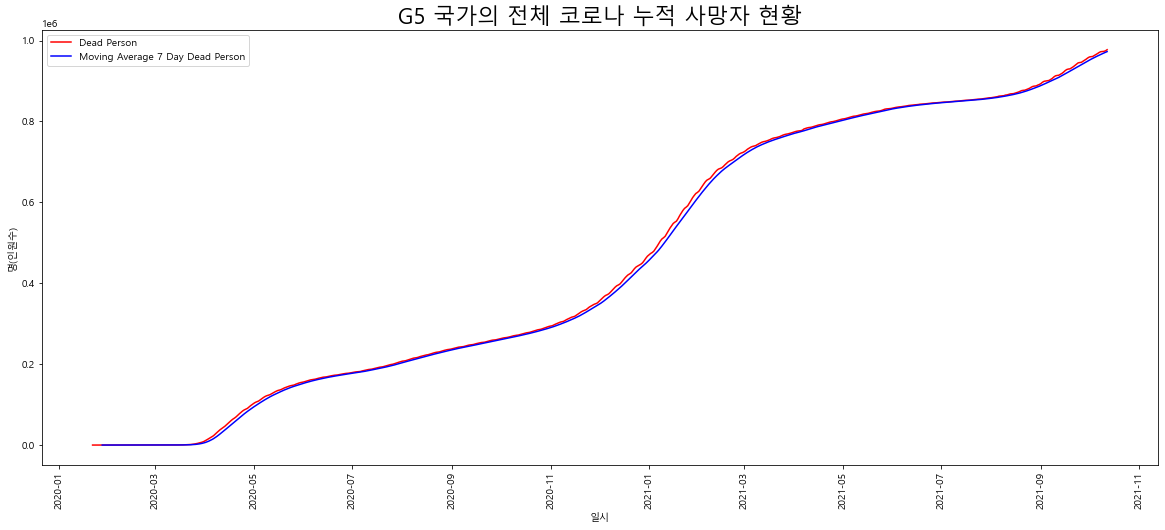

In [27]:
Line_Plot(origin = df_TD["Total_Dead"], origin_MV=df_TD["Total_Dead_MV"],labels1="Dead",labels2 = "Dead",title = "G5 국가의 전체 코로나 누적 사망자 현황")

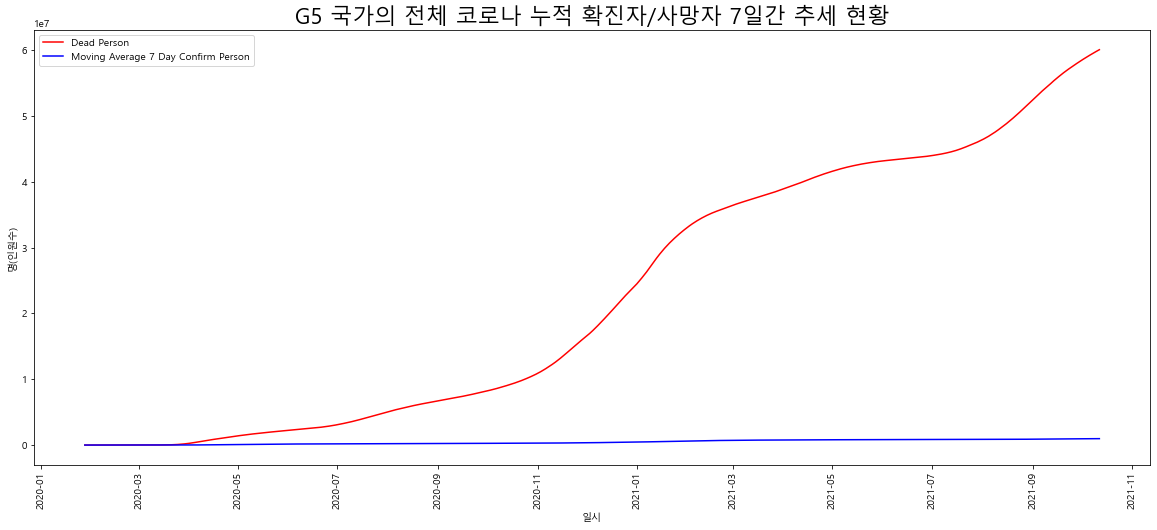

In [28]:
Line_Plot(origin = df_TC["Total_Confirm_MV"], origin_MV=df_TD["Total_Dead_MV"],labels2="Confirm",labels1="Dead",title = "G5 국가의 전체 코로나 누적 확진자/사망자 7일간 추세 현황")

G6 국가의 전체 코로나 누적 상황을 살펴보았을때,7일간의 추세선을 그대로 따라가는것을 알수 있었다. 또한 확진자 수와 사망자 수를 한 그래프로 나타냈을때, 여때까지 코로나에 확진이 되면 사망할 확률이 낮다는 것을 알 수 있었다.

In [29]:
print("코로나 확진에서 사망자로 이어질 확률 : ",round((df_TD.tail(1).values/ df_TC.tail(1).values)[0][0],4)," 입니다.")

코로나 확진에서 사망자로 이어질 확률 :  0.0162  입니다.


전체 데이터에 대해서 일자별 확진자수 사망자수 정보를 추출하고 시각화를 진행한다.

4) G6 국가의 전체 일일 확진자/ 사망자 수에 대한 시각화


In [30]:
### 일일 확진자/ 사망자수
df_TC["Total_Confirm_Day"]  = df_TC["Total_Confirm"] - df_TC["Total_Confirm"].shift(+1)
df_TD["Total_Dead_Day"]  = df_TD["Total_Dead"] - df_TD["Total_Dead"].shift(+1)


### 7일간 일일 확진자/ 사망자수
df_TD["Total_Dead_Day_MV"] = df_TD["Total_Dead_Day"].rolling(window=7).mean()
df_TC["Total_Confirm_Day_MV"] = df_TC["Total_Confirm_Day"].rolling(window=7).mean()

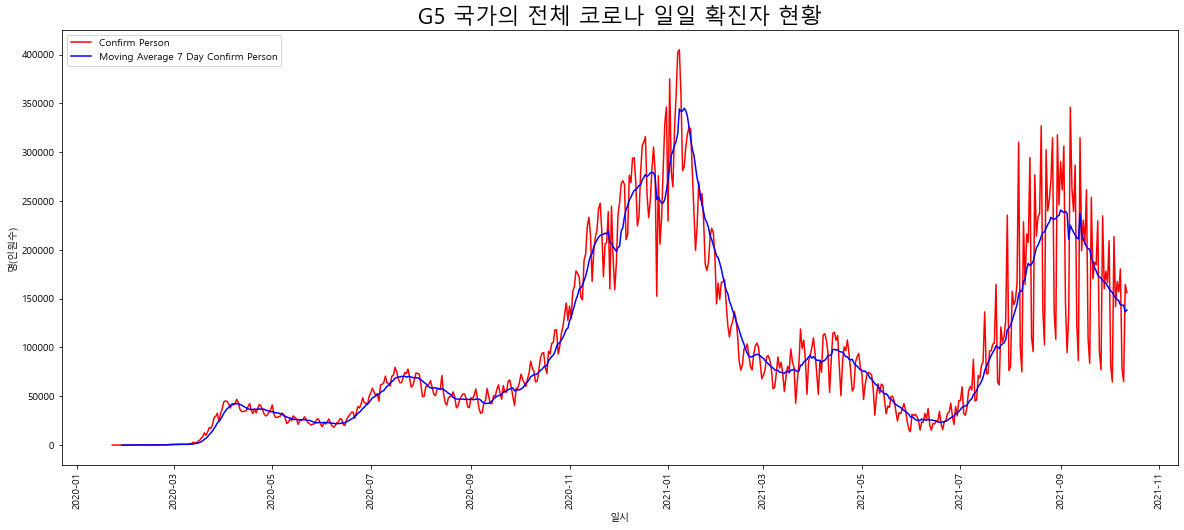

In [31]:
Line_Plot(origin = df_TC["Total_Confirm_Day"], origin_MV=df_TC["Total_Confirm_Day_MV"],labels1="Confirm",labels2 = "Confirm",title = "G5 국가의 전체 코로나 일일 확진자 현황")

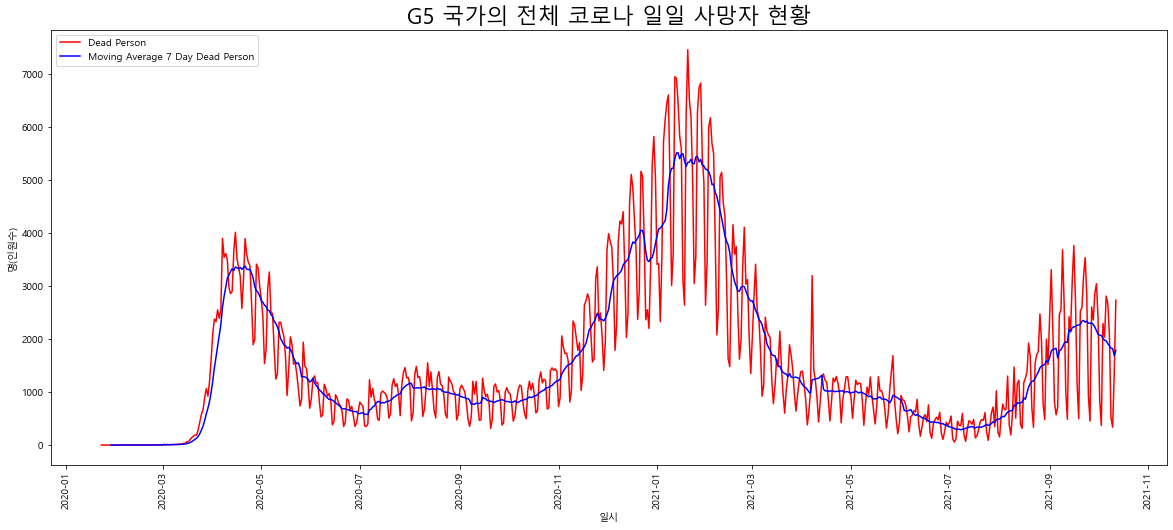

In [32]:
Line_Plot(origin = df_TD["Total_Dead_Day"], origin_MV=df_TD["Total_Dead_Day_MV"],labels1="Dead",labels2 = "Dead",title = "G5 국가의 전체 코로나 일일 사망자 현황")

### 3.1번에 대한 분석 결론
G6 국가의 전체적인 일일 추세는 확진자의 수와 사망자의 수가 요글래 증가했다가 감소하는 추세라고 볼수 있겠습니다. 또한 1차 대유행과 2차 대유행이 되는 구간이 어디있는지 알 수 있으며 현재는 3차의 대유행이 시작되었다가 줄어드는 추세라고 말할 수 있겠습니다.

## 3.2 개별 국가(G6)에 대해서 확진자/ 사망자 수를 시각화.

1) 개별 국가 데이터로 변환.

In [33]:
df_C = df_C.T
df_D = df_D.T

In [34]:
df_C.columns = df_C.loc["Country/Region"].values
df_D.columns = df_D.loc["Country/Region"].values

df_C = df_C.drop("Country/Region",axis=0)
df_D = df_D.drop("Country/Region",axis=0)

In [35]:
df_D = df_D.reset_index()
df_C = df_C.reset_index()
# 타임시리즈로 데이터 형 변환.
df_D["index"] = pd.to_datetime(df_D["index"])
df_C["index"] = pd.to_datetime(df_C["index"])
df_D.set_index("index",inplace=True)
df_C.set_index("index",inplace=True)

In [36]:
## 일일 확진자/ 사망자 정보 추출.
df_C_diff = df_C - df_C.shift(+1)
df_D_diff = df_D - df_D.shift(+1)

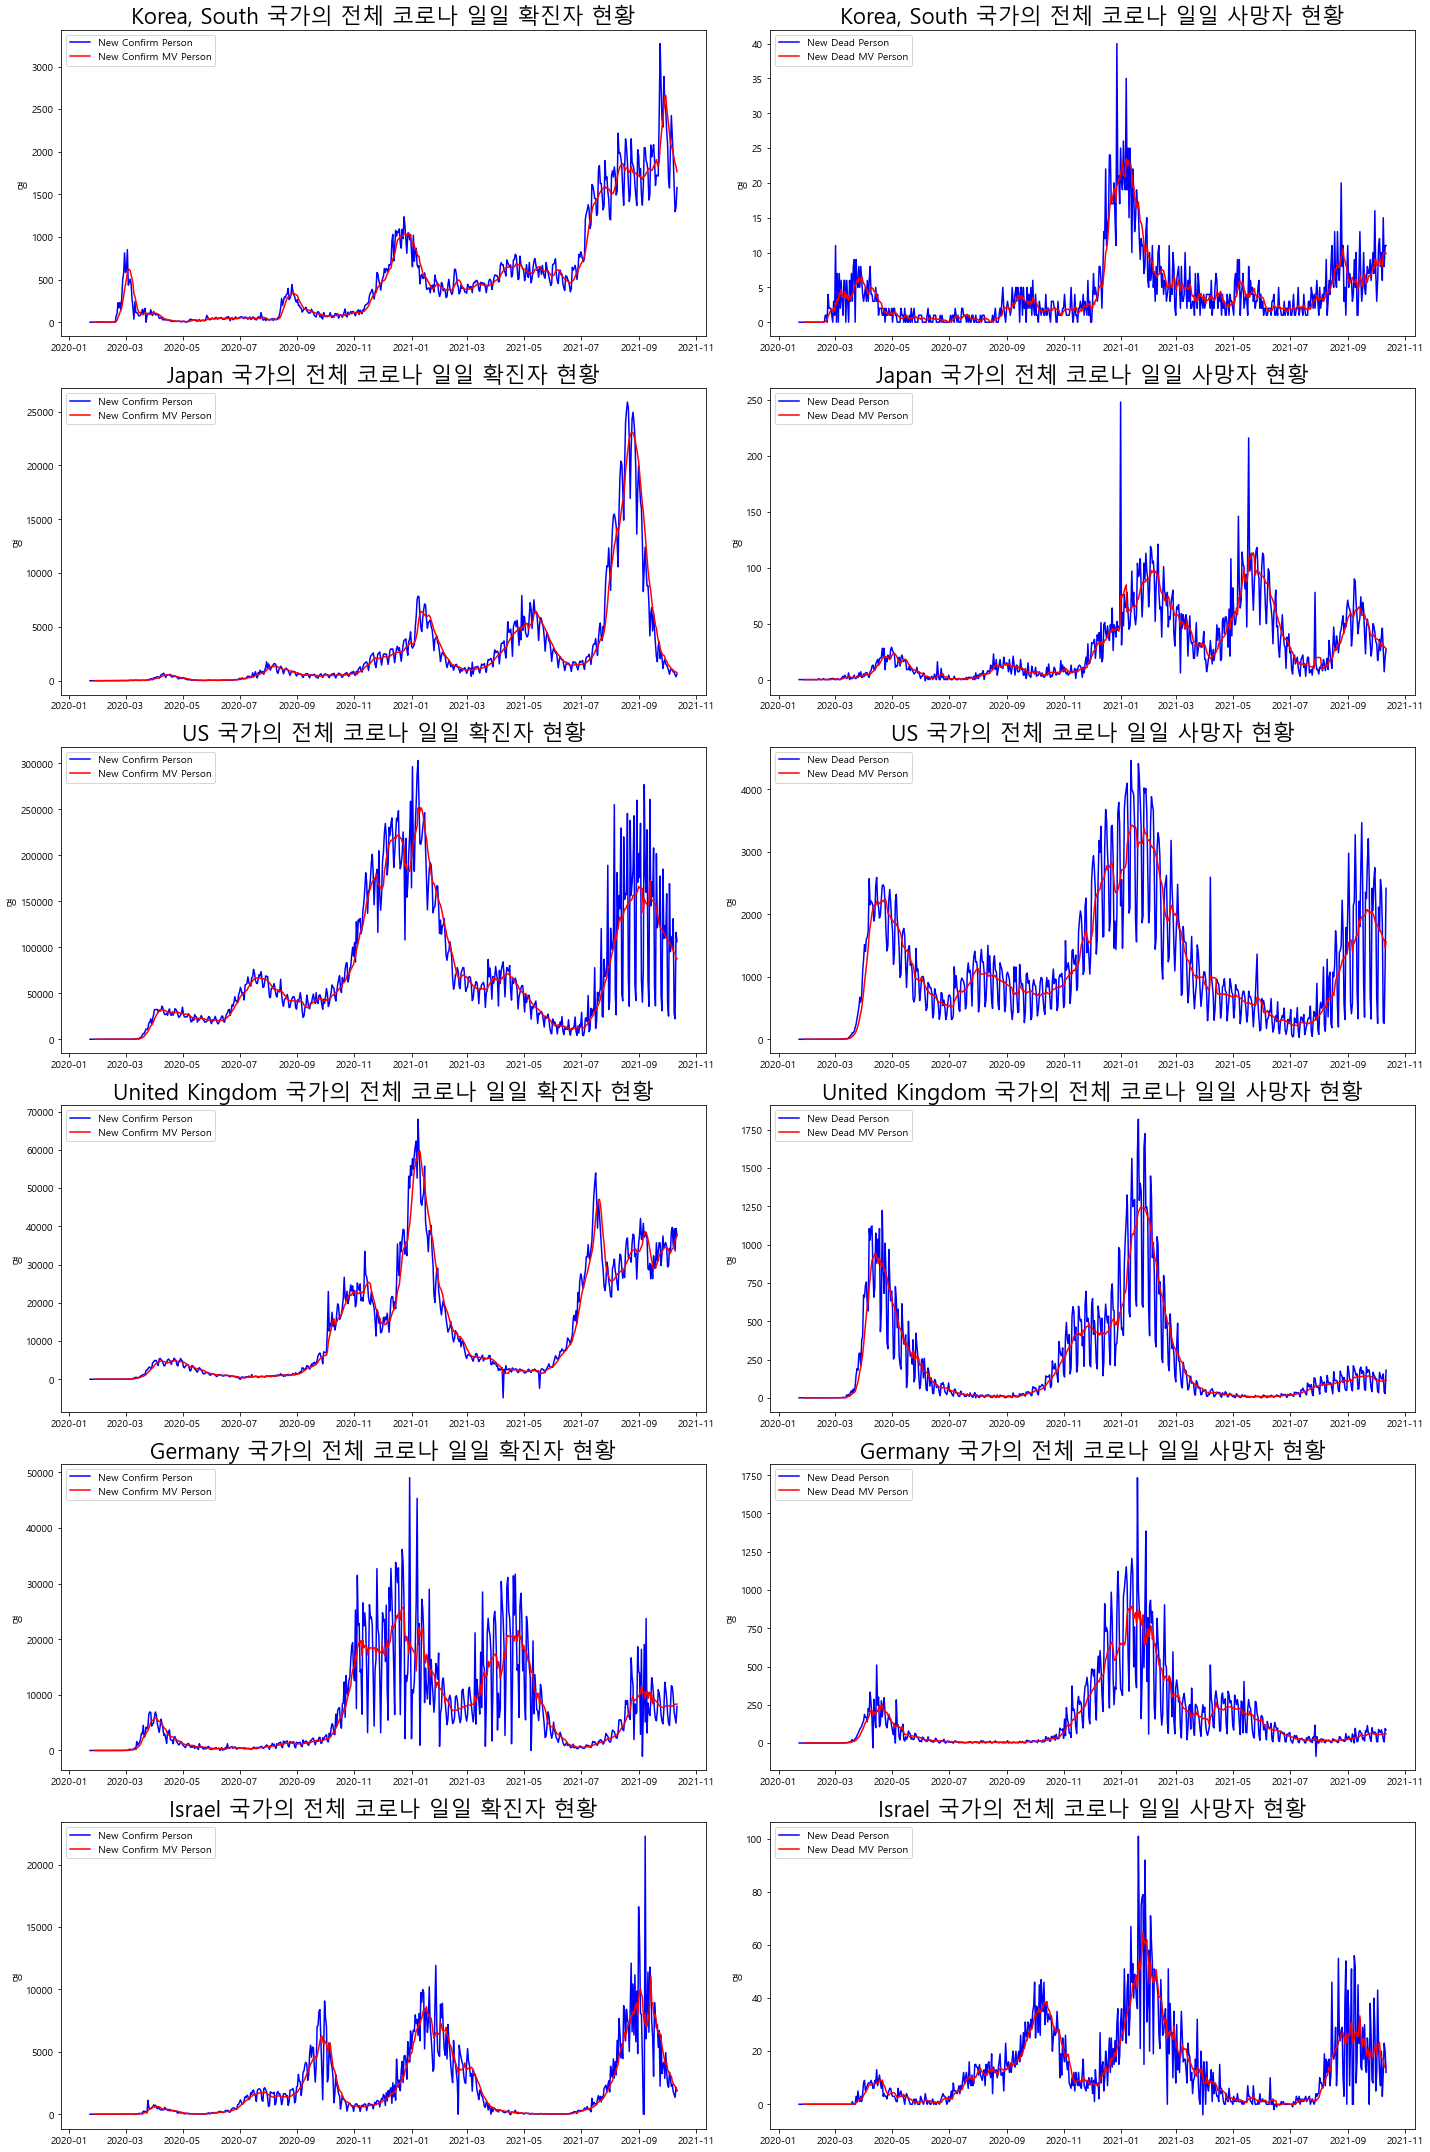

In [37]:
f,a = plt.subplots(ncols=2,nrows=6,figsize=(20,30))

for idx,country in enumerate(G6_Country):
    co, de = a[idx][0],a[idx][1] # co : 확진자 정보, de : 사망자 정보
    df_C_diff[f"{country}_MV"] = df_C_diff[country].fillna(0).rolling(window=7).mean()
    df_D_diff[f"{country}_MV"] = df_D_diff[country].fillna(0).rolling(window=7).mean()
    
    co.plot(df_C_diff[country],label = "New Confirm Person",color = 'blue')
    co.plot(df_C_diff[f"{country}_MV"],label = "New Confirm MV Person",color = 'red')
    
    de.plot(df_D_diff[country],label = "New Dead Person",color = 'blue')
    de.plot(df_D_diff[f"{country}_MV"],label = "New Dead MV Person",color = 'red')
    
    co.legend(loc = "upper left")
    co.set_title(f"{country} 국가의 전체 코로나 일일 확진자 현황",fontsize=22)
    
    de.legend(loc = "upper left")
    de.set_title(f"{country} 국가의 전체 코로나 일일 사망자 현황",fontsize=22)
    de.set_ylabel("명")
    co.set_ylabel("명")
    
plt.tight_layout()
plt.show()

G6 국가의 일일 코로나 확진자 수에 대해서 시각화를 해보았지만, 다른 나라와 비교해서 살펴보기에는 y 축의 범위가 달라서 비교할 수가 없었다. 단지 위 자료를 보고 해당 국가들의 추세를 파악할 수 있었다.

추세를 파악한 결과로는 우선 미국과 영국의 확진자 추세가 비슷하다고 볼 수 있었고, 이스라엘과 독일 또한 약간에 시간 차이가 있지만 비슷한 추세인 것을 확인할 수 있었고, 우리나라와 일본이 비슷한 추세인 것을 볼 수 있었다.

**하지만 이것만 보았을 때 우리나라가 방역 대응을 잘하고 있다? 라고 평가할 수 없다. 그래서 나라별로 확진자에서 사망자로 가는 지표를 만들어서 나라별로 비교를 해 분석하면 좋을 것으로 판단된다..**

* 해당 지표를 만드는 이유는 갑자기 확진자가 많아지면, 해당 나라에서 수용할 수 있는 병실이 부족해지고, 병원이 포화가 되어 급한 환자도 병실이 없어 갈 곳도 없는 상황이 생기기 때문에, 이 정도를 표현하기 위해 '사망자 수' 나누기 '확진자 수'를 하여 지표를 만들고자 한다.


In [38]:
# tmp = df_D_diff["Korea, South_MV"].fillna(0) / (df_C_diff["Korea, South"].fillna(0) +1)

In [39]:
temp3 = pd.DataFrame()

for country in G6_Country:
    tmp = pd.DataFrame(df_D_diff[f"{country}_MV"].fillna(0) / (df_C_diff[f"{country}_MV"].fillna(0) +1))
    temp3 = pd.concat([temp3, tmp],axis=1)

In [40]:
temp3.describe()

,"Korea, South_MV",Japan_MV,US_MV,United Kingdom_MV,Germany_MV,Israel_MV
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.017701,0.028431,0.021232,0.032947,0.025715,0.014767
std,0.026447,0.046512,0.018020,0.049004,0.028826,0.022445
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014423
25%,0.004015,0.007523,0.011539,0.003347,0.004528,0.003155
50%,0.008581,0.014370,0.016785,0.010690,0.012997,0.006551
75%,0.019612,0.030612,0.024679,0.035061,0.038542,0.017275
max,0.173077,0.311628,0.130435,0.219791,0.121870,0.123457


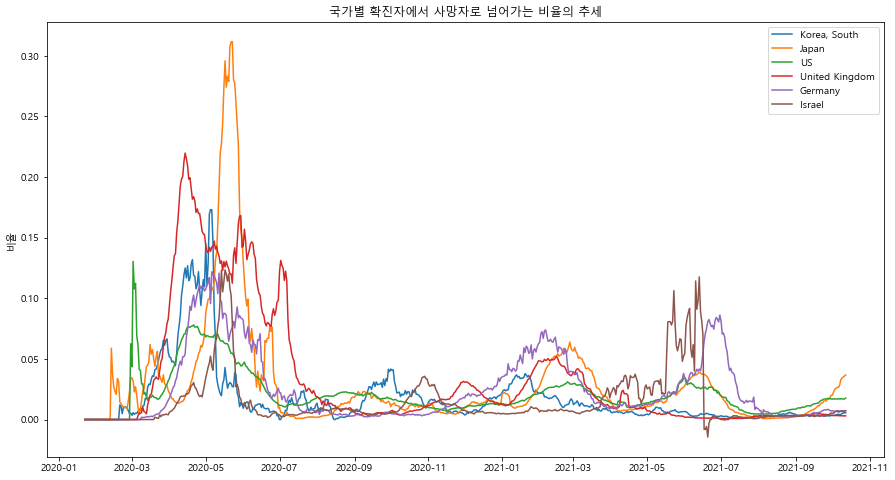

In [41]:
plt.figure(figsize=(15,8))
for country in G6_Country:
    plt.plot(temp3[f"{country}_MV"],label=f"{country}")

plt.title("국가별 확진자에서 사망자로 넘어가는 비율의 추세")
plt.legend()
plt.ylabel("비율")
plt.show()

G6 국가에서 코로나를 처음 유입됐을 때, 준비가 제대로 되지 않아 확진자에서 사망자로 넘어가는 추세가 다들 높았다. 하지만, 시간이 지날수록 위 국가들은 코로나를 견뎌냈고, 지금도 견뎌내고 있다. **그런 상황에서 다른 나라와 우리나라를 살펴보면, 장기로 갈수록 확진자 수보다 사망률이 떨어지는 것을 알 수 있다.** `그만큼 방역에 대응을 철저히 한 것으로 볼 수 있다.` 또 우리나라와 이웃 국가인 일본을 보면 2021.5월에 올림픽 개최로 방역에 소홀히 했고 그 결과가 주황색 선으로 보인다.


### 3번문제에 대한 결론.
**`우리나라도 코로나 초반에 방역 대응이 그렇게 잘되었다고 말을 할 수 없지만, 장기전에 갈수록 다른 나라에 비해 확진자에서 사망이 되는 비율이 점차 줄어들고 그만큼 방역에 대응을 열심히 하고 있고 국민들도 열심히 동참했다고 볼 수 있겠다.`** 앞에서 이야기했지만 일본의 경우는 옆 나라이다. 그런데 도쿄 올림픽을 준비한다고 방역에 소홀해지면서 병실 부족 현상이 생겼고 그에 따라 방역이 실패되어 낮아지는 추세가 증가하여 하나의 대유행 구간이 생기게 된 것을 볼 수 있었다. [1]

> 앵커 : 
    올림픽이 열리고 있는 일본에서는 하루 확진자 수가 연일 최다를 기록하면서 결국 일본 정부가 올림픽 개막 일주일 만에 긴급 사태 선언 지역을 확대하고, 기간도 추가로 연장하기로 했습니다.
    **급속도로 확산하는 원인으로 언론과 전문가들은 모두 올림픽을 지목하고 있지만, 일본 정부는 애써 외면하고 있는 모습인데요** [2]
    도쿄에서 고현승 특파원이 취재했습니다.
    
출처 :
* [1] : [일본 내 '의료붕괴'로 비롯된 비극들](http://www.newstof.com/news/articleView.html?idxno=12120)
* [2] : [긴급사태선언' 확대에도 곳곳 술판…日 "올림픽과 무관"](https://imnews.imbc.com/replay/2021/nwdesk/article/6290291_34936.html)

# 문제 4

* 문제 3의 경우에서 다시 인구 수 별 비율로 표현하려는 노력도 함께해주세요.
* 5개 국가뿐이니 인구수는 단순검색을 통해 용이하게 구할 수 있을 것으로 보입니다.

### 4-1. G6 국가별 인구수 조사. [1]
* 대한민국 -> 51,672,400 명
* 일본 -> 126,050,796 명
* 미국 -> 332,915,074 명
* 영국 -> 68,207,114 명
* 독일 -> 83,900,471 명
* 이스라엘 -> 9,375,695 명

출처 : 
* [1] : [국가별 인구 순위](https://namu.wiki/w/%EA%B5%AD%EA%B0%80%EB%B3%84%20%EC%9D%B8%EA%B5%AC%20%EC%88%9C%EC%9C%84)

### 4.2 G6 국가별 인구수에 따른 확진자의 추세 시각화

In [42]:
# 정보 입력
population_dic = {
    'Korea, South' : 51672400,
    'Japan': 126050796,
    'US': 332915074,
    'United Kingdom': 68207114,
    'Germany': 83900471,
    'Israel':9375695,
}

In [43]:
# 인구대비 확진자 수로 변환
temp4 = pd.DataFrame()

for country in G6_Country:
    tmp = pd.DataFrame(df_C_diff[f"{country}_MV"].fillna(0) / population_dic[country])
    temp4 = pd.concat([temp4, tmp],axis=1)

In [44]:
temp4.describe()

,"Korea, South_MV",Japan_MV,US_MV,United Kingdom_MV,Germany_MV,Israel_MV
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.000010,0.000022,0.000211,0.000189,0.000082,0.000221
std,0.000012,0.000034,0.000187,0.000212,0.000085,0.000272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000001,0.000003,0.000072,0.000022,0.000010,0.000013
50%,0.000008,0.000010,0.000157,0.000072,0.000044,0.000095
75%,0.000012,0.000024,0.000313,0.000337,0.000128,0.000364
max,0.000052,0.000183,0.000757,0.000875,0.000307,0.001176


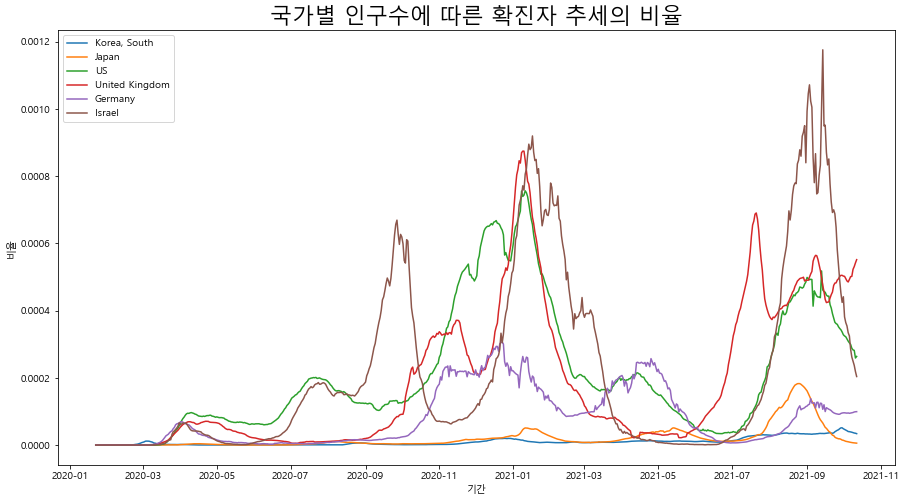

In [45]:
plt.figure(figsize=(15,8))
for country in G6_Country:
    plt.plot(temp4[f"{country}_MV"],label=f"{country}")

plt.title("국가별 인구수에 따른 확진자 추세의 비율",fontsize=22)
plt.legend()
plt.ylabel("비율")
plt.xlabel("기간")
plt.show()

#### Wow !! 

확진자 추세를 인구수 대비를 통해 국가별로 비교를 해보면, 서방국가들이 아시아 국가보다 인구대비 확진자가 될 비율이 높다. 그  수치가 많이 높은 게 아니라, 소수점 네 번째자리에서  비교가 된다. 그렇지만 우리나라와 선진국을 비교해보면 월등히 낮는 것을 알 수 있다. 결과적으로 코로나에 대처를 잘해 국가적 위상이 높아져, G7 모임에 초청될 수 있었다. [1] 또 우리나라의 방역 선두에서 지휘하셨던 정은경 질병 관리청장님을 이야기를 해본다면, BBC에서 "올해는 격동의 시기에 변화를 이끌고 차이를 만든 이들에 주목했다"며 100인 선정했다. 그중에서 유일하게 한국인으로 정은경 질병 관리청장님이 선정됐으며 BBC에서 이야기하기를 한국의 코로나 19 대응을 이끄는 `'바이러스 사냥꾼'`[2] 으로 소개했습니다. **이처럼 우리나라가 다른 나라에 비해 코로나 19 방역 대응을 잘하고 있다는 것을 알 수 있는 대목입니다.**

출처 :
* [1] : [[G7정상회의]높아진 국제 위상...패싱 논란도 잠재울까](https://m.etnews.com/20210613000086)
* [2] : [정은경 청장, BBC '올해의 여성 100인'에 선정](https://www.ytn.co.kr/_ln/0104_202011241705087746)

### 4.3 G6 국가별 인구수에 따른 사망자의 추세 시각화

In [46]:
temp5 = pd.DataFrame()

for country in G6_Country:
    tmp = pd.DataFrame(df_D_diff[f"{country}_MV"].fillna(0) / population_dic[country])
    temp5 = pd.concat([temp5, tmp],axis=1)

In [47]:
temp5.describe()

,"Korea, South_MV",Japan_MV,US_MV,United Kingdom_MV,Germany_MV,Israel_MV
count,6.300000e+02,6.300000e+02,630.000000,6.300000e+02,6.300000e+02,6.300000e+02
mean,7.905640e-08,2.257503e-07,0.000003,3.202837e-06,1.782292e-06,1.338386e-06
std,8.814109e-08,2.302417e-07,0.000003,4.394940e-06,2.486341e-06,1.437627e-06
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-4.571090e-08
25%,2.488203e-08,4.306654e-08,0.000002,2.199184e-07,1.281280e-07,1.676066e-07
50%,5.529340e-08,1.291996e-07,0.000003,1.220024e-06,6.002010e-07,9.065995e-07
75%,9.952813e-08,3.649322e-07,0.000005,4.971727e-06,2.458696e-06,2.098892e-06
max,4.534059e-07,8.998640e-07,0.000010,1.830350e-05,1.066059e-05,6.917582e-06


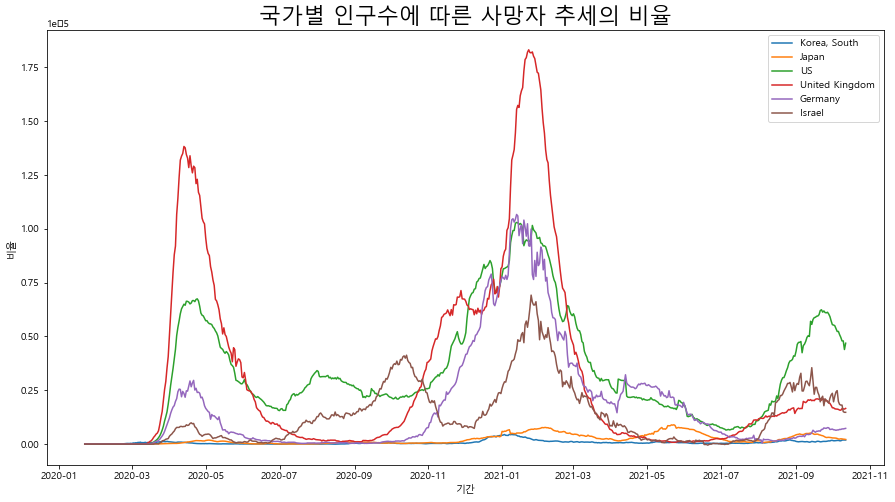

In [48]:
plt.figure(figsize=(15,8))
for country in G6_Country:
    plt.plot(temp5[f"{country}_MV"],label=f"{country}")

plt.title("국가별 인구수에 따른 사망자 추세의 비율",fontsize=22)
plt.legend()
plt.ylabel("비율")
plt.xlabel("기간")
plt.show()

국가별로 인구수 대비 사망자 비율의 추세를 비교해보면, 영국의 경우 2021.02쯤에 사망자가 급증했다가 현재는 줄어든것을 볼 수 있으며, 미국과 독일 이스라엘 경우 같은 시기때 사망자가 급증했고 현재는 줄어든 상태로 보여진다.

---

### 4번 결론.

G6 국가를 인구수별 확진자 수와 사망자 수의 추세를 보았을 때, 유독 **`우리나라가 낮은 수치를 보여주며 방역을 잘하고 있는 것을 알 수 있었고,`** 또 `2021.02월에 확진자 추세와 사망자 추세가 급증하고 있다. 이것에 대해 조사를 진행해보니 이 시기에 델타 변이가 유행했고, 그에 따라 코로나 확진자 수가 급증한 것으로 보인다.` 또한, 이스라엘 경우 뉴스에서 WHO에서 권고하지 않는 부스터 샷을 국민들에게 접종했고 코로나 확진자 수가 급증했지만, 사망자 수는 훨씬 줄어든 것을 알 수 있었다. 이것을 통해 백신을 부스터 샷까지 접종하면 코로나에 걸렸지만, 사망까지 가는 비율이 낮아질 수 있는 것을 볼 수 있었다.


---


# 문제 5
* 전체 데이터의 시계열분석을 통해 전체트렌드와 주기별특성을 관찰해주세요. 어떤 특
이점이 있나요?
* 5개 각 국가의 데이터에서는 동일 과정에서 어떤 특이한 현상이 있나요?


###  1. 전체 데이터에 대한 트랜드 파악.

In [49]:
from fbprophet import Prophet
from datetime import datetime 

Importing plotly failed. Interactive plots will not work.


In [50]:
treand_T = df_TC.reset_index()

In [51]:
treand_T.rename(columns={treand_T.columns[0]: "ds"}, inplace=True)

In [52]:
treand_T["Total_Confirm_Day_MV"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
625    143643.571429
626    143268.857143
627    143308.857143
628    136299.000000
629    138307.571429
Name: Total_Confirm_Day_MV, Length: 630, dtype: float64

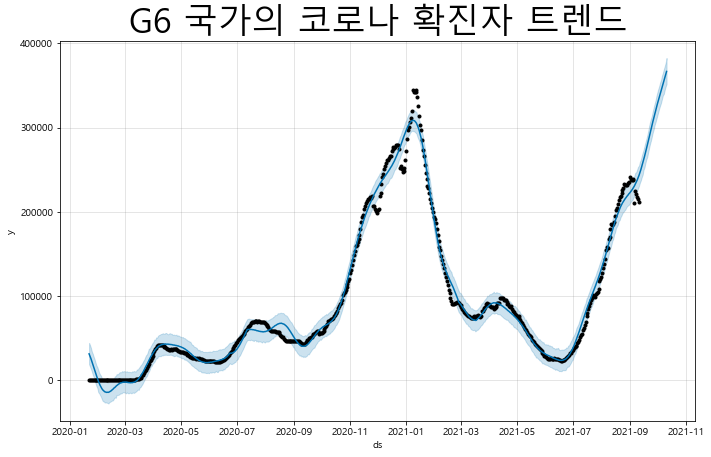

In [53]:
temp = pd.DataFrame(treand_T["ds"])
tmp = treand_T["Total_Confirm_Day_MV"].fillna(0)
temp = pd.concat([temp,tmp],axis=1)
temp.rename(columns={temp.columns[1]: "y"}, inplace=True)
train = temp[temp["ds"] <= "2021-09-11"]
m = Prophet(yearly_seasonality=True, daily_seasonality=True,)
m.fit(train);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
fig = m.plot(forecast);
ax = fig.gca()
ax.set_title("G6 국가의 코로나 확진자 트렌드", size=34)
plt.show()

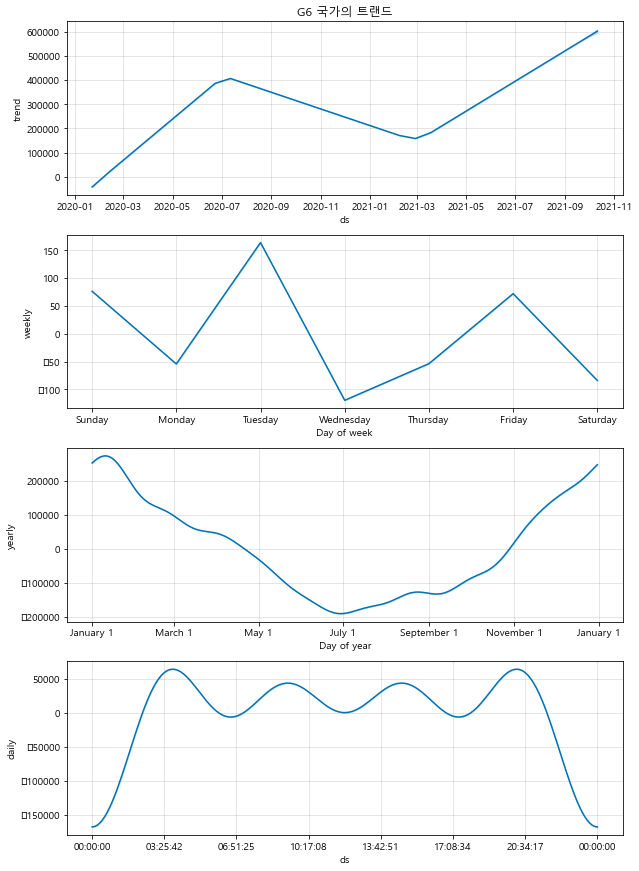

In [54]:
components_fig =m.plot_components(forecast)
axes = components_fig.get_axes()
axes[0].set_title("G6 국가의 트랜드")
plt.show()

### 전체에 대해 분석 결과 요일은 화요일이 제일 높게 확진자가 발생하고, 계절성은 겨울시기에 확진자 수가 많아지는 것을 볼 수 있다.

### 2. G6 국가들에 대한 트렌드 파악.

In [55]:
treand_C = df_C_diff.reset_index()
treand_D = df_D_diff.reset_index()

In [56]:
treand_C.rename(columns={treand_C.columns[0]: "ds"}, inplace=True)
treand_D.rename(columns={treand_D.columns[0]: "ds"}, inplace=True)

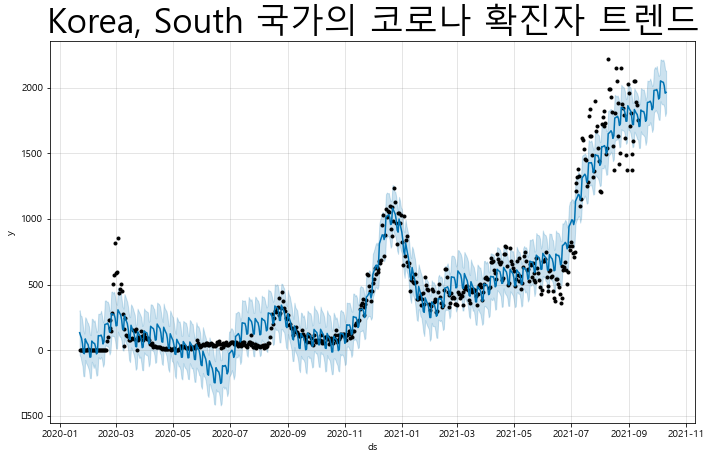

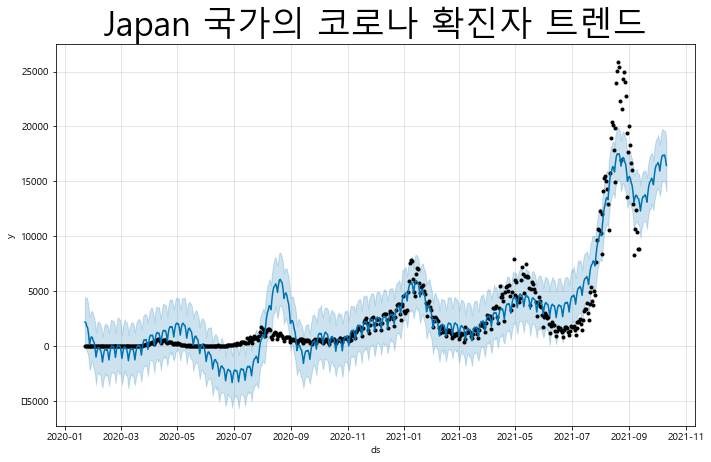

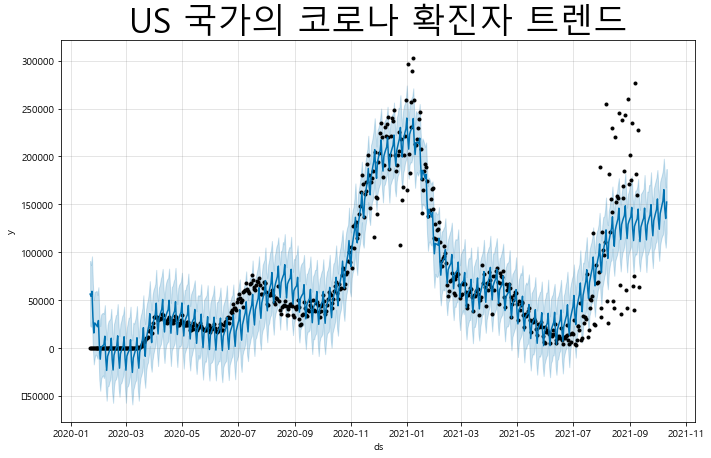

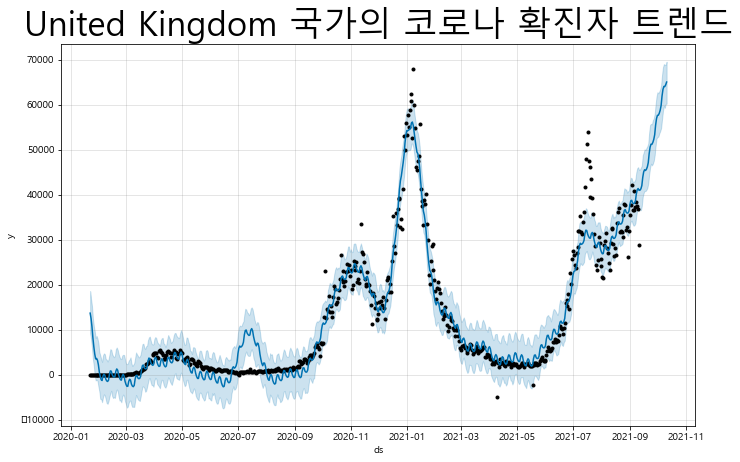

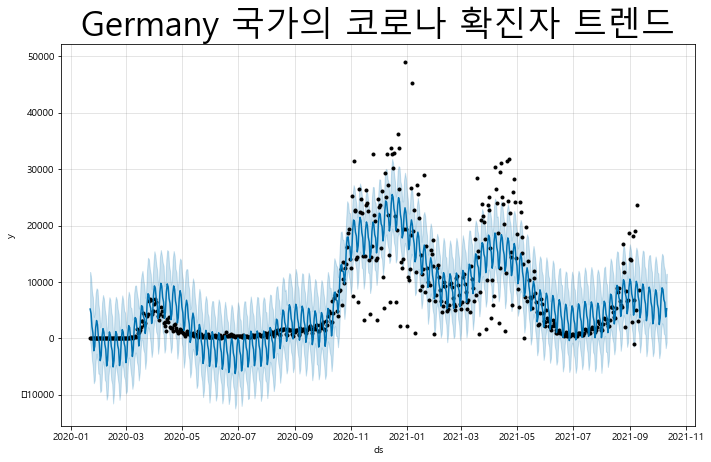

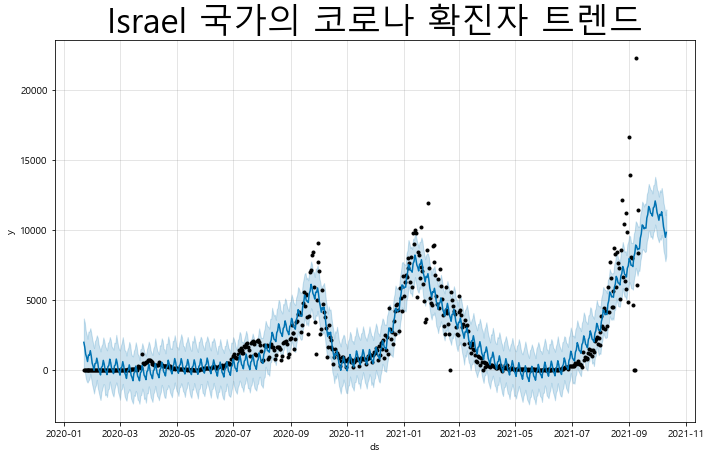

In [57]:
M_list = []
for country in G6_Country:
    temp = pd.DataFrame(treand_C["ds"])
    tmp = treand_C[f"{country}"].fillna(0)
    temp = pd.concat([temp,tmp],axis=1)
    temp.rename(columns={temp.columns[1]: "y"}, inplace=True)
    train = temp[temp["ds"] <= "2021-09-11"]
    m = Prophet(yearly_seasonality=True, daily_seasonality=True,)
    m.fit(train);
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    fig = m.plot(forecast);
    ax = fig.gca()
    ax.set_title(f"{country} 국가의 코로나 확진자 트렌드", size=34)
    plt.show()
    M_list.append([m,forecast])

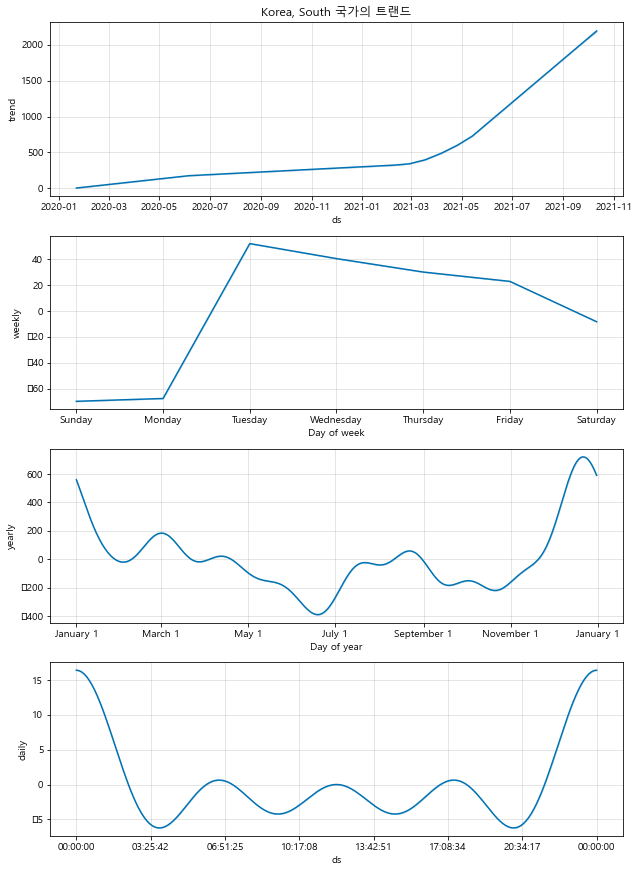

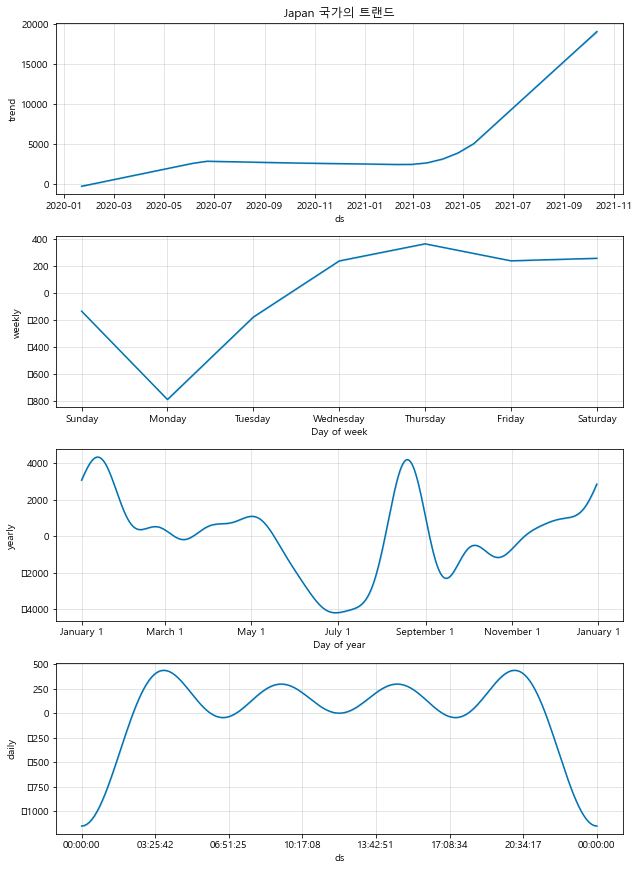

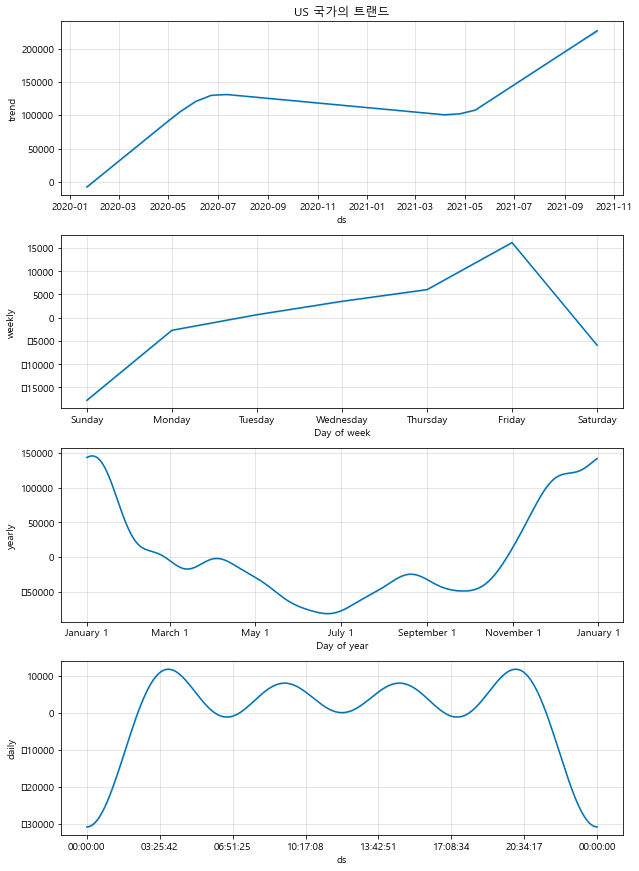

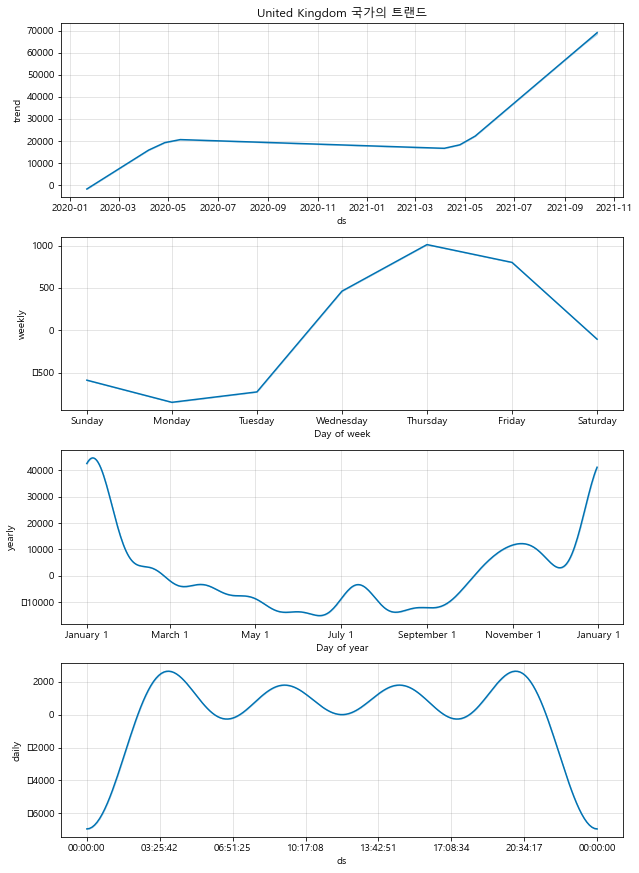

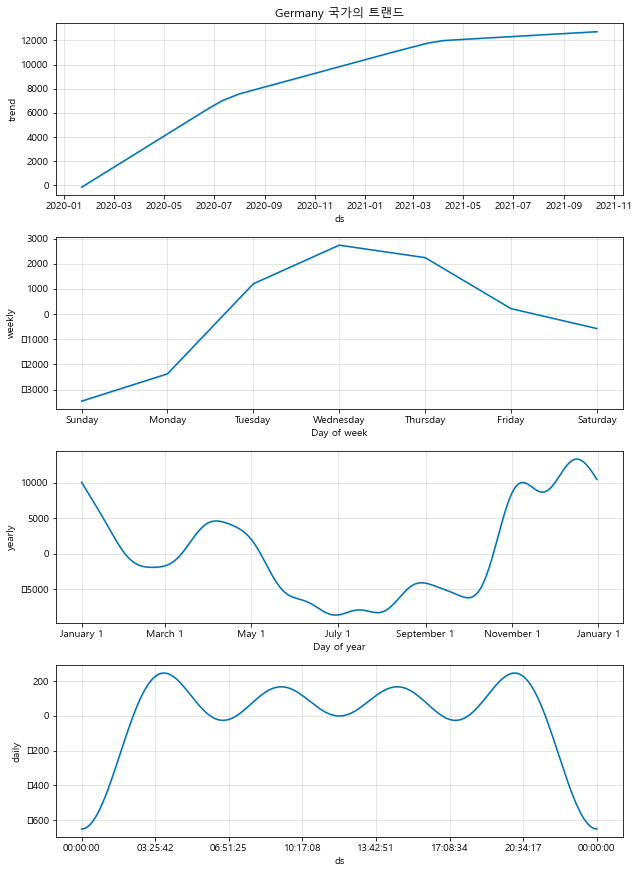

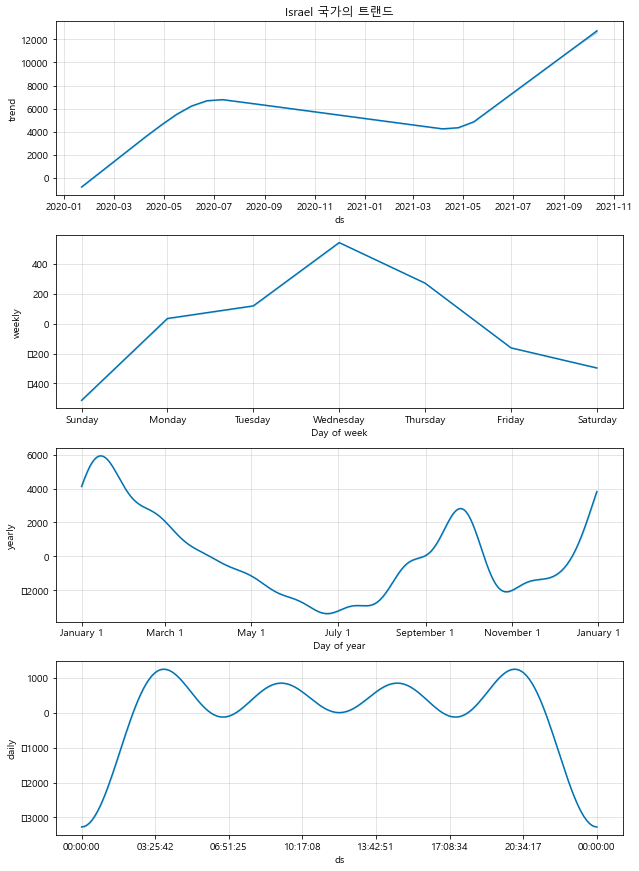

In [58]:
for i in range(6):
    components_fig = M_list[i][0].plot_components(M_list[i][1])
    axes = components_fig.get_axes()
    axes[0].set_title(f"{G6_Country[i]} 국가의 트랜드")
    plt.show()

**`G6 국가들의 공통적인 특징은 전체 트렌드에 나온 결과와 동일하게 겨울이기에 코로나 확진자가 많이 발생하는 트렌드를 확인할 수 있었다.`** 하지만 요일은 국가마다 특징이 달라서 다른 트렌드의 결과가 발생한다. 대표적으로 우리나라는 코로나 검사 시 주말에는 운영하지 않는다. 그래서 사람들이 주말에 검사를 받지 않으면 월요일 가서 검사를 맡는다. 그러면 검사 후 하루 뒤에 검사 결과가 나오는데, 이때가 바로 화요일이다. 그래서 우리나라 요일 트렌드는 화요일이 제일 확진자 수가 많다. 이걸 뒷받침하고 한다면 코로나 검사 횟수에 대한 데이터를 가져와서 비교하면 좋을 것 같다.

일본과 영국은 목욜일날 확진자 비율이 높게 형성된다는 점이 있었고, 미국의 경우는 금요일이 제일 높은 것을 나타났다. 마지막으로 이스라엘 경우에는 수요일이 제일 높았다.

### 5번 결론.
코로나 19가 계절성을 확실히 타고 그 계절성이 겨울일때 극도로 힘을 발휘해 확진자수가 급증하게 된다. 그렇기에 겨울이 되는 시기에는 모든 국가에서 코로나 19 확산을 대비해서 조심해야할 것으로 보여진다.

---


# 문제 6
* 여러분들이선정한5개국가를기준으로우리나라는어떻다고이야기할수있을까요
* 그판단의근거를다시잘정리해서함께보여주세요.
* 이과정에서문제1에서구하지않은또다른 추가데이터를사용해도됩니다.(예를들
어백신접종률데이터)
* 물론추가되는데이터는여러분들이직접검색해서찾아야합니다.


### 가설 설정.

    첫번째 가설 : 우리나라는 다른 나라에 비해 코로나 19 방역 대응을 잘하고 있다.
    
    두번째 가설 : 부스터 샷이 효과가 있으니깐 정부에서 맞으라고 한다.
    
    세번째 가설 : 국가별 백신 접종이 높을수록 코로나 확산을 감소 시킬 것이다.

### 1. 첫번째 가설 입증.

    가설 : 우리나라는 다른 나라에 비해 코로나 19 방역 대응을 잘하고 있다.

<Figure size 1080x576 with 0 Axes>

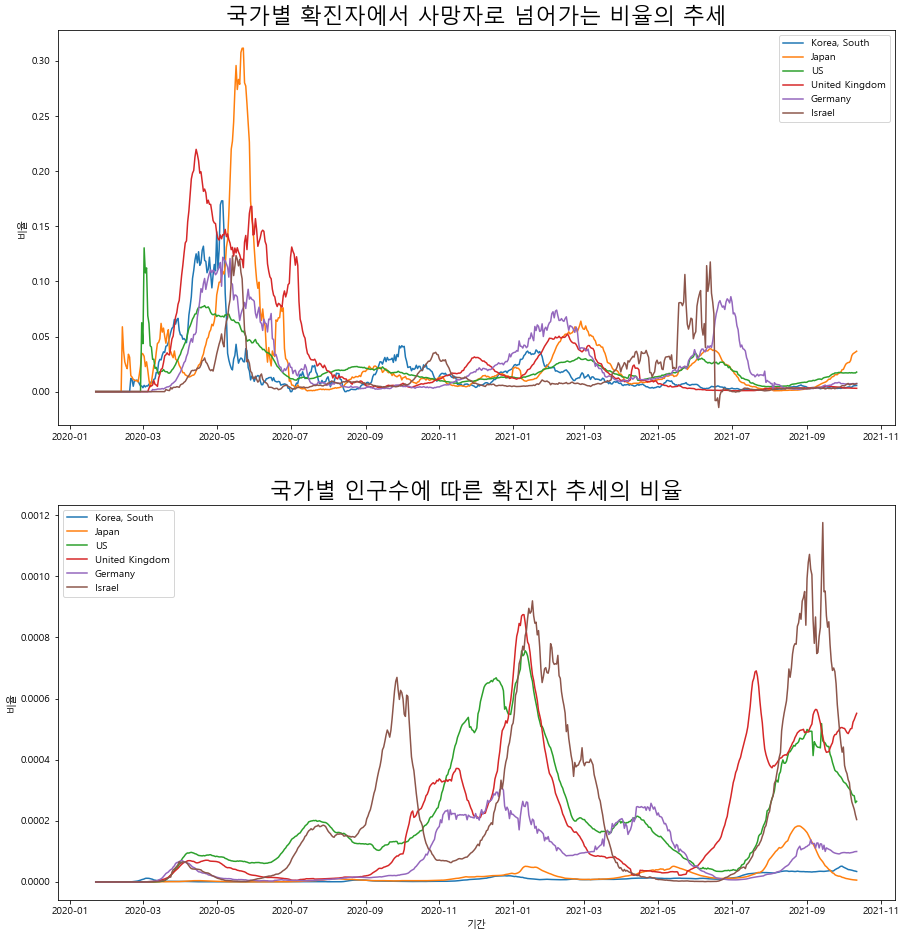

In [59]:
plt.figure(figsize=(15,8))
f,a = plt.subplots(nrows=2,figsize=(15,16))

for country in G6_Country:
    a[0].plot(temp3[f"{country}_MV"],label=f"{country}")

a[0].set_title("국가별 확진자에서 사망자로 넘어가는 비율의 추세",fontsize=22)
a[0].legend()
a[0].set_ylabel("비율")

for country in G6_Country:
    a[1].plot(temp4[f"{country}_MV"],label=f"{country}")

a[1].set_title("국가별 인구수에 따른 확진자 추세의 비율",fontsize=22)
a[1].legend()
a[1].set_ylabel("비율")
a[1].set_xlabel("기간")
plt.show()

해당 두 개의 그래프를 보면 **우리나라가 다른 나라에 비해 상당히 낮은 수치로 추세를 이어가는 것을 알 수 있다.** `이를 통해 우리나라는 다른 나라에 비해 국내외적으로 코로나 19와 변이 바이러스들을 잘 준비하여 대응하고 있는 것 처럼 보인다.` 그리고 우리나라가 코로나에 방역 대응을 잘하고 있기에 서방국가들도 인정하여 G7 모임에 초청되었고 BBC에서 선정한 바이러스 사냥꾼으로 코로나 방역에서 선두를 지위하고 있는 정은경 질병 관리청장님이 선정되었다. **이처럼 기사와 분석자료를 통해 우리나라가 코로나 19 방역 얼마나 대응이 우수하게 하고 있는 국가인 것을 알 수 있었고, 방역을 위해 힘써주는 분들의 노고가 분석 통해 드러나서 한 번 더 감사함을 느낍니다. **

### 2. 두번째 가설 입증.

    가설 : 부스터 샷이 효과가 있으니깐 정부에서 맞으라고 한다.
    
이 주제는 매우 화도가 되는 주제로 알고 있습니다. 왜냐하면 처음 이스라엘에서 부스터샷을 국민들에게 접종하게 한다고 권고할때 WHO에서 부스터샷의 필요성에 대한 근거가 없다며 중단을 촉구했었다[1]. 하지만 이스라엘에서 부스터샷을 국민들에게 접종을 권고 했고 국민들은 접종을 하여 1회 접종률 66%, 2회 접종률 61% 3회 접종률 23%인 상황이다. 그래서 과연 부스터샷을 제일 먼저 접종을 시작했고 그 접종 결과가 있는지 확인하고자 합니다.



출처 
* [1] : [이스라엘 부스터샷 첫 승인…WHO "중단해야" 촉구](https://www.yonhapnewstv.co.kr/news/MYH20210713019500038)
* [2] : [부스터샷까지 맞는데…이스라엘, 하루 확진자 1만여명 '최다'](https://www.hankyung.com/international/article/202109014040i)

In [60]:
G6_Country

['Korea, South', 'Japan', 'US', 'United Kingdom', 'Germany', 'Israel']

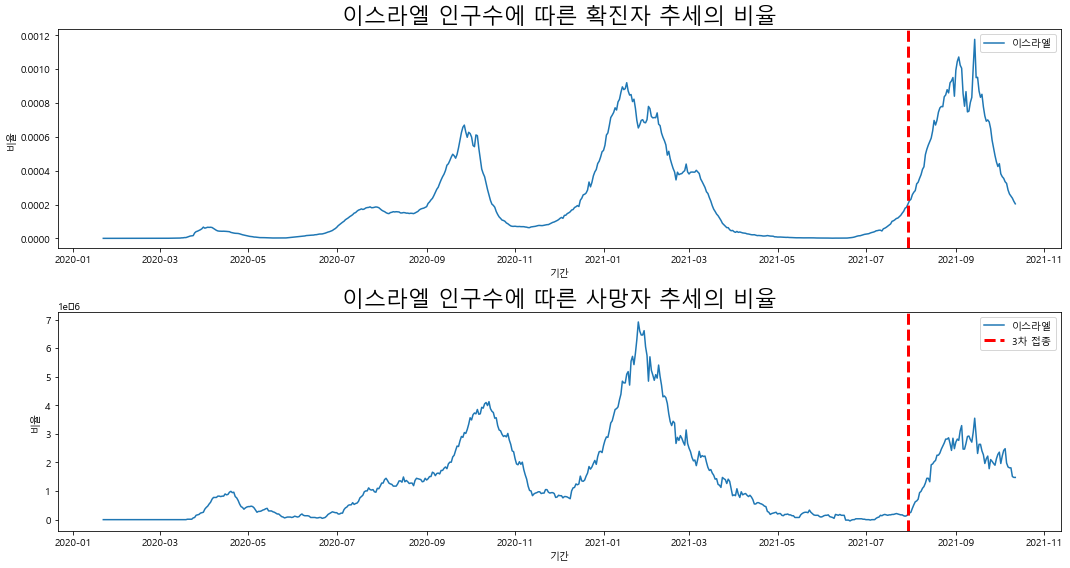

In [61]:
f,a = plt.subplots(nrows=2,figsize=(15,8))

for country in G6_Country:
    if country == "Israel":
        a[0].plot(temp4[f"{country}_MV"],label=f"{country}")

a[0].set_title("이스라엘 인구수에 따른 확진자 추세의 비율",fontsize=22)
a[0].legend(["이스라엘","3차 접종"])
a[0].set_ylabel("비율")
a[0].set_xlabel("기간")

for country in G6_Country:
    if country == "Israel":
        a[1].plot(temp5[f"{country}_MV"],label=f"{country}")

a[1].axvline(x = temp5.loc["2021-07-30"].reset_index().columns[1],color='red',linestyle='--', linewidth=3)
a[0].axvline(x = temp5.loc["2021-07-30"].reset_index().columns[1],color='red',linestyle='--', linewidth=3)

a[1].set_title("이스라엘 인구수에 따른 사망자 추세의 비율",fontsize=22)
a[1].legend(["이스라엘","3차 접종"])
a[1].set_ylabel("비율")
a[1].set_xlabel("기간")
plt.tight_layout()
plt.show()

해당 그래프는 이스라엘에 대한 코로나 그래프이다. 여기서 빨강 선은 3차 부스터 샷을 접종을 권고하여 접종을 시작한 시점을 가리킨다. 그러면 과연 3차 접종이 코로나 예방에 도움이 됐을까? 첫 번째 그래프를 보면 확산자 추세를 나타낸 그래프인데, 빨강색 시점 이후에 코로나 유행 곡선이 발생했고 이전보다 높은 확진자가 발생했다. 그럼 3차 부스터 샷까지 맞으면 코로나 예방에 도움이 된다. 라고 정확히 말을 할 수 없을 것이다. 하지만 코로나 백신을 접종해 3차까지 맞는다면, 확진이 돼서 사망까지 될 위험부담이 적어진다는 것을 두 번째 그래프를 통해 알 수 있다. 왜냐하면 이스라엘에서 이전 코로나 유행 때 사망자 수가 높았다. 하지만 빨강색선 이후 이전보다 높은 확진자 수이지만 사망자 추세는 과거보다 훨씬 떨어진다는 결과를 알 수 있다. 그렇기에 다음과 같은 결론을 도출할 수 있을 것이다.

**코로나 부스터 샷을 접종한다면 코로나 예방은 힘들지만, 사망까지 갈 확률은 이전보다 많이 떨어진다는 결론을 도출할 수 있다.
그럼 가설을 세운 부스터 샷이 효과가 있냐? 사람마다 다르겠지만 결과를 보았을 때는 코로나 19로 죽는 것을 무서워한다면 접종을 하는 게 도움이 될 것으로 판단되었다.** 그렇기에 우리나라 정부에서 부스터 샷을 허용했고 위 데이터 결과를 보고 접종하기 원하신다면 접종하는 것도 좋을 것으로 판단된다. [1]

출처
* [1] : [이제는 코로나 19 백신 '부스터 샷'의 시간...대상∙방법 놓고 깊어지는 고민](http://medigatenews.com/news/2584056258)

###  1. 세번째 가설 입증.

    가설 : 국가별 백신 접종이 높을수록 코로나 확산을 감소 시킬 것이다.
    
백신을 접종을 하면 코로나에 방역 대응에 우수하다고 정부에서 이야기를 한다. 그러면 백신을 접종하지 않은 입자에서는 정말 코로나 백신을 접종을 하면 코로나 확산을 감소시키냐 라는 의문이 생길 것이다. 그럼 국가별로 백신 접종률을 조사하여 바 그래프로 나타내고 해당 바 그래프와 이전에 코로나 확산 추세 그래프를 분석하여 위 가설을 입증하고자 한다.

* 국가별 백신접종률 정보 데이터 출처 : [코로나 백신: 한눈에 보는 전 세계 코로나19 백신 접종 현황](https://www.bbc.com/korean/features-56066227) 
![백신접종률 정보 위치 알림](https://blog.kakaocdn.net/dn/uDnKM/btrhEFMFGsY/hpYb7F2xrq4lipuZO5aU60/img.png)

In [62]:
vaccine_df = pd.DataFrame({
    "Japen" : [138.5],
    "Korea, South" : [134.3],
    "US" : [119.5],
    "Israel" : [177.7],
    "United Kingdom":[140.6],
    "Germany":[130.0],
    
}).T.reset_index()
vaccine_df.columns = ["국가","100명당 접종회분"]
vaccine_df.head(2)

,국가,100명당 접종회분
0,Japen,138.5
1,"Korea, South",134.3


In [63]:
vaccine_df = vaccine_df.sort_values(by="100명당 접종회분").reset_index(drop=True)
vaccine_df

,국가,100명당 접종회분
0,US,119.5
1,Germany,130.0
2,"Korea, South",134.3
3,Japen,138.5
4,United Kingdom,140.6
5,Israel,177.7


<AxesSubplot:xlabel='국가', ylabel='100명당 접종회분'>

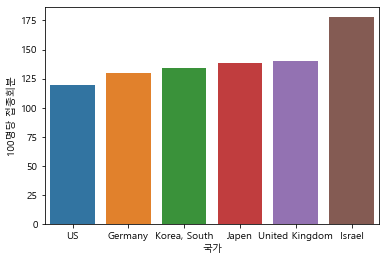

In [64]:
sns.barplot(data=vaccine_df,x="국가",y="100명당 접종회분")

미국이 100명당 접종회분이 제일 낮은것으로 알 수 있었고, 이스라엘이 G6 국가중에서 제일 높은 백신 접종률인것을 알 수 있었다.

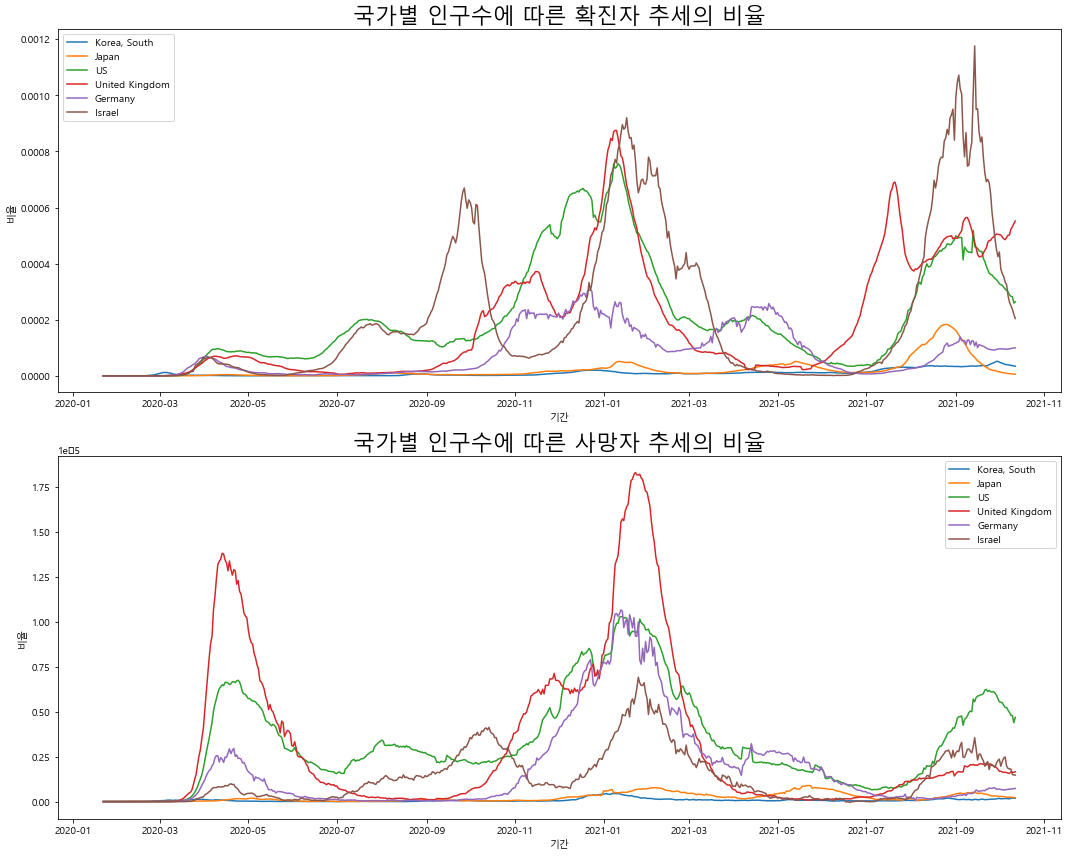

In [65]:
f,a = plt.subplots(nrows=2,figsize=(15,12))

for country in G6_Country:
    a[0].plot(temp4[f"{country}_MV"],label=f"{country}")

a[0].set_title("국가별 인구수에 따른 확진자 추세의 비율",fontsize=22)
a[0].legend()
a[0].set_ylabel("비율")
a[0].set_xlabel("기간")

for country in G6_Country:
    a[1].plot(temp5[f"{country}_MV"],label=f"{country}")


a[1].set_title("국가별 인구수에 따른 사망자 추세의 비율",fontsize=22)
a[1].legend()
a[1].set_ylabel("비율")
a[1].set_xlabel("기간")
plt.tight_layout()
plt.show()

`바 그래프로 이스라엘이 접종이 높았던걸로 알 수 있었다. 그 다음순은 영국,일본, 한국, 독일 미국 순이며 맨위 그래프를 보면 국가별 인구수에 따른 확진자 추세 비율이다`. 백신 보급이 상요화된 2021년 7월 이후로 그래프를 살펴보면 접종률이 제일 높은 이스라엘 국가에서 확진자가 많이 발생했고, 다음은 영국이 확진자 발생 추세가 높다. 그 다음으로는 미국이다. 이것을 통해 백신 접종이 코로나 확산을 감소 시킬수 있다. 라고 할수 없어보인다. 단지 같은 구간에 사망자를 살펴보면 백신을 접종을 많이한 이스라엘 국가에서 확진자가 많지만 사망자수는 떨어진다. 반면에 미국은 백신 접종률이 G6 국가중에서 제일 낮다. 그로인해 사망자 확진자 대비 사망자 수가 높은것으로 보여진다. **`그렇기 때문에 백신을 맞으면 코로나 확산을 막을 수 있다. 라는 표현보다는 백신을 맞으면 코로나에 내성이 생겨 사망까지 가는 확률이 낮아진다고 말하는게 알맞는 표현으로 판단되었다.`**

# 문제 7

* 이제다시문제6에이어서혹시한나라의의료수준을가늠할데이터가있을까요?예
를들어심혈관계혹은암으로인한사망률혹은생존률과같은데이터
* 매우조심스럽지만한나라의의료수준을수치화할수있을까요?
* 그렇다면그의료수준대비covid19데이터를다시정리해볼수있을까요?
* 그렇게 했을때문제6의결과와비교해서달라져보이는것이있나요?
* 이번문제는추가로인구대비의상황도함께고려해주세요.

### 데이터 소개

세계 보건 통계 2020년 데이터셋에서 심혈관 질환, 암, 당뇨병 또는 만성 호흡기 질환으로 인해 30세에서 70세 사이에 사망할 확률.이라는 데이터를 사용해 데이터를 분석을 진행합니다.


![데이터 정보](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F9JQVf%2FbtrhzSzf15W%2F0E2WLJ2vPwa99jgB8CIBBK%2Fimg.png)

출처 : [World Health Statistics 2020|Complete|Geo-Analysis](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete)

* Location : 국가
* Dim1 : 성별
* Indicator : 지시자
* First Tooltip : 심혈관 질환, 암, 당뇨병 또는 만성 호흡기 질환으로 인해 30세에서 70세 사이에 사망할 확률
* Period : 기간

In [66]:
df_car =  pd.read_csv("./30-70cancerChdEtc.csv")
df_car

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9
...,...,...,...,...,...
2740,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Male,22.1
2741,Zimbabwe,2005,Probability (%) of dying between age 30 and ex...,Female,22.9
2742,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Both sexes,21.6
2743,Zimbabwe,2000,Probability (%) of dying between age 30 and ex...,Male,21.6


국가별로 최신에 대한 정보를 집계하여 비전염성 질별 또는 정신 건강일때 사망률이 적은 국가와 높은 국가를 알아보고자 합니다.

In [67]:
new_df_car = df_car[["Location","Period"]].groupby(["Location"]).max().reset_index()
new_df_car

,Location,Period
0,Afghanistan,2016
1,Albania,2016
2,Algeria,2016
3,Angola,2016
4,Antigua and Barbuda,2016
...,...,...
179,Venezuela (Bolivarian Republic of),2016
180,Viet Nam,2016
181,Yemen,2016
182,Zambia,2016


In [68]:
new_df_car["최신"] = 1

In [69]:
df_car = df_car.merge(new_df_car,on=["Location","Period"],how="inner").reset_index(drop=True)
df_car.shape

(552, 6)

In [70]:
# 성별 및 남여 종합이 3가지 특성이 있으니 184 * 3을 했을때 df_car의 shape이 552이가 나오면 정상이다.
184 * 3

552

In [71]:
df_car_both = df_car[df_car["Dim1"] == "Both sexes"]
df_car_both.head()

,Location,Period,Indicator,Dim1,First Tooltip,최신
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8,1
3,Albania,2016,Probability (%) of dying between age 30 and ex...,Both sexes,17.0,1
6,Algeria,2016,Probability (%) of dying between age 30 and ex...,Both sexes,14.2,1
9,Angola,2016,Probability (%) of dying between age 30 and ex...,Both sexes,16.5,1
12,Antigua and Barbuda,2016,Probability (%) of dying between age 30 and ex...,Both sexes,22.6,1


* 위험 국가 탑 10

In [72]:
Dangerous_country = df_car_both.sort_values("First Tooltip",ascending=False).head(10)
Dangerous_country

,Location,Period,Indicator,Dim1,First Tooltip,최신
543,Yemen,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.6,1
171,Fiji,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.6,1
210,Guyana,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.5,1
435,Sierra Leone,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.5,1
324,Mongolia,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.2,1
372,Papua New Guinea,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.0,1
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8,1
507,Turkmenistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.5,1
117,Côte d’Ivoire,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.1,1
261,Kiribati,2016,Probability (%) of dying between age 30 and ex...,Both sexes,28.4,1


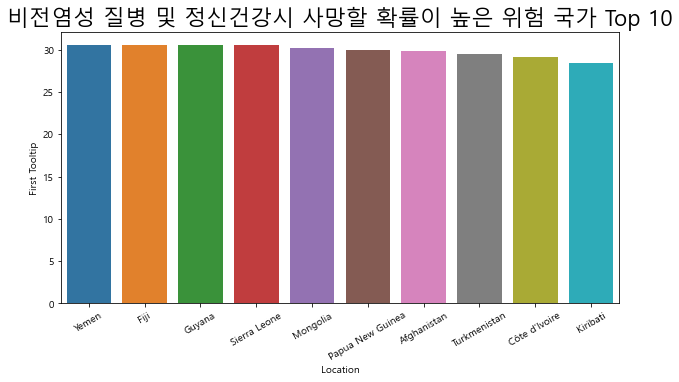

In [73]:
plt.figure(figsize = (10,5))
sns.barplot(data=Dangerous_country,x="Location",y="First Tooltip");
plt.title("비전염성 질병 및 정신건강시 사망할 확률이 높은 위험 국가 Top 10",fontsize=22)
plt.xticks(rotation=30)
plt.show()

* 안전한 국가 탑 10

In [74]:
Safe_country = df_car_both.sort_values("First Tooltip",ascending=True).head(10)
Safe_country

,Location,Period,Indicator,Dim1,First Tooltip,최신
393,Republic of Korea,2016,Probability (%) of dying between age 30 and ex...,Both sexes,7.8,1
249,Japan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,8.4,1
477,Switzerland,2016,Probability (%) of dying between age 30 and ex...,Both sexes,8.6,1
474,Sweden,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.1,1
222,Iceland,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.1,1
21,Australia,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.1,1
360,Norway,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.2,1
438,Singapore,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.3,1
243,Italy,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.5,1
240,Israel,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.6,1


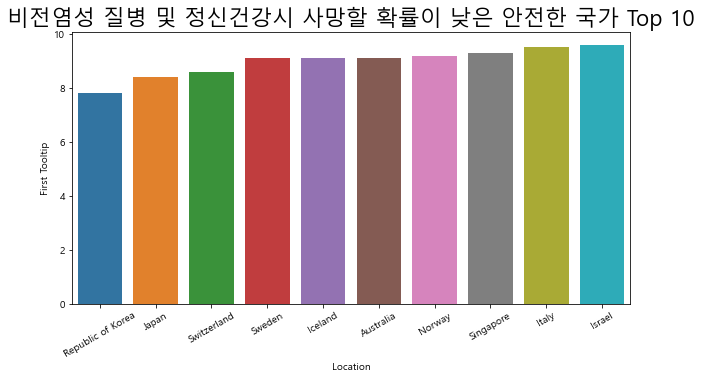

In [75]:
plt.figure(figsize = (10,5))
sns.barplot(data=Safe_country,x="Location",y="First Tooltip");
plt.title("비전염성 질병 및 정신건강시 사망할 확률이 낮은 안전한 국가 Top 10",fontsize=22)
plt.xticks(rotation=30)
plt.show()

결과를 보았을때 위험한 국가 Top 10은 예멘, 피지, 가이아나, 시에라리온, 몽골,파푸아뉴기니, 아프가니스탄, 투르크메니스탄, 코트디부아르,키리바시 이며, 안전한 국가 Top 10은 대한민국, 일본, 스위스, 스웨덴, 아이슬란드,호주, 노르웨이, 싱가포르, 이탈리아,이스라엘이 이라는 것을 알수 있었다.

여기서 G6이라고 이야기했던 미국, 영국, 독일, 대한민국, 일본, 이스라엘 중에 3개 국이 포함되고 나머지 3개국은 몇등인지 알아보도록 하겠습니다.

In [76]:
df_car_both = df_car_both.sort_values("First Tooltip",ascending=True).reset_index(drop=True)
df_car_both

,Location,Period,Indicator,Dim1,First Tooltip,최신
0,Republic of Korea,2016,Probability (%) of dying between age 30 and ex...,Both sexes,7.8,1
1,Japan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,8.4,1
2,Switzerland,2016,Probability (%) of dying between age 30 and ex...,Both sexes,8.6,1
3,Sweden,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.1,1
4,Iceland,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.1,1
...,...,...,...,...,...,...
179,Mongolia,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.2,1
180,Guyana,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.5,1
181,Sierra Leone,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.5,1
182,Fiji,2016,Probability (%) of dying between age 30 and ex...,Both sexes,30.6,1


In [77]:
df_car_both["등수"] = np.arange(1,185)

In [78]:
# 독일 
df_car_both[df_car_both["Location"] =="Germany"]

,Location,Period,Indicator,Dim1,First Tooltip,최신,등수
27,Germany,2016,Probability (%) of dying between age 30 and ex...,Both sexes,12.1,1,28


In [79]:
# 미국 
df_car_both[df_car_both["Location"] =="United States of America"]

,Location,Period,Indicator,Dim1,First Tooltip,최신,등수
43,United States of America,2016,Probability (%) of dying between age 30 and ex...,Both sexes,14.6,1,44


In [80]:
# 영국
df_car_both[df_car_both["Location"] =="United Kingdom of Great Britain and Northern Ireland"]

,Location,Period,Indicator,Dim1,First Tooltip,최신,등수
18,United Kingdom of Great Britain and Northern I...,2016,Probability (%) of dying between age 30 and ex...,Both sexes,10.9,1,19


In [81]:
# 이스라엘 
df_car_both[df_car_both["Location"] =="Israel"]

,Location,Period,Indicator,Dim1,First Tooltip,최신,등수
9,Israel,2016,Probability (%) of dying between age 30 and ex...,Both sexes,9.6,1,10


**종합을 해보면 한국 1등, 일본 2등, 이스라엘 10등, 영국 19등, 독일 28등, 미국 44등인 것으로 알수 있었다.**

## 총괄 결론.
우리나라는 다른 나라에 비해 코로나 19 바이러스에 대해 방역 대응을 우수하게 잘하고 있다. 또한 문제 7번에서 얻은 국가별 비전염성 질병 및 정신 건강이 사망할 확률이 제일 낮은 국가가 우리나라이다. 그렇기에 우리나라가 의료수준이 높다고는 해당 데이터만 봤을 때는 말할 수는 없다. 하지만 전염성에도 우리나라가 방역 대응에 강하고 비전염성 질병에서도 매우 강한 것으로 판단됩니다. 이렇게 저희가 전염성도 강한 이유는 국민들과 단합하여 코로나에 대응하여 잘 견디며 규율을 잘 지켜서 좋은 결과가 발생한 것 같다.

그리고 문제 6번의 결과와 비교해서 달라진 결과는 없다.

출처 :

< 코로나 관련 조사 링크들...>
* https://www.bbc.com/korean/news-56164856
* https://www.sisain.co.kr/news/articleView.html?idxno=45023
* https://www.medric.or.kr/Controls/Sub.aspx?d=03&s=02&s2=01&g=TENDENCY&c=&m=VIEW&i=3503
* https://www.dongascience.com/news.php?idx=49113
* https://www.medworld.co.kr/news/articleView.html?idxno=204073
* https://www.pharmnews.com/news/articleView.html?idxno=106183
* https://www.donga.com/news/Inter/article/all/20210709/107883163/1